In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import statsmodels.api as sm
import statsmodels.formula.api as smf
from statsmodels.genmod.families import NegativeBinomial
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.preprocessing import StandardScaler


# IMPORTING DATASETS

In [ ]:
gdp =pd.read_excel('GDP DATA.xlsx')
gdp = gdp[gdp['GeoName'] != 'United States']
gdp.head(10)

,GeoFIPS,GeoName,Region,TableName,LineCode,IndustryClassification,Description,Unit,1998,1999,...,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023
4,"""01000""",Alabama,5.0,SASUMMARY,4,...,Gross domestic product (GDP),Millions of current dollars,110838.8,116514.3,...,197064.4,203113.3,208824.3,216615.5,226263.8,234798.2,235325.3,260018.4,284949.1,304935.6
5,"""01000""",Alabama,5.0,SASUMMARY,5,...,Personal income,Millions of current dollars,99772.9,103204.1,...,179487.1,187474.7,190871.8,197963.8,205674.2,215151.8,230732.2,254960.4,262235.6,276925.6
6,"""01000""",Alabama,5.0,SASUMMARY,7,...,Personal consumption expenditures,Millions of current dollars,80320.5,84866.0,...,148385.6,152790.5,157806.1,163523.4,169460.2,177059.6,175833.9,198895.8,215682.5,227475.0
7,"""01000""",Alabama,5.0,SASUMMARY,15,...,Total employment (number of jobs),Number of jobs,2361892.0,2378217.0,...,2552256.0,2587641.0,2619761.0,2649222.0,2692424.0,2712014.0,2670753.0,2769122.0,2854910.0,2939353.0
8,"""02000""",Alaska,8.0,SASUMMARY,4,...,Gross domestic product (GDP),Millions of current dollars,24387.8,24920.4,...,56587.4,51574.2,51121.8,53550.9,54762.0,54549.6,51283.4,58943.5,66271.9,68056.0
9,"""02000""",Alaska,8.0,SASUMMARY,5,...,Personal income,Millions of current dollars,18155.9,18706.6,...,40642.1,41918.6,41285.5,41919.4,43522.7,44459.7,45339.6,48183.7,50606.8,52520.0
10,"""02000""",Alaska,8.0,SASUMMARY,7,...,Personal consumption expenditures,Millions of current dollars,14946.5,15883.5,...,32641.4,33274.4,33976.4,34926.8,36077.1,36873.0,35064.0,39778.9,43438.8,46131.3
11,"""02000""",Alaska,8.0,SASUMMARY,15,...,Total employment (number of jobs),Number of jobs,382166.0,381307.0,...,461371.0,461707.0,457142.0,455550.0,454776.0,454794.0,430867.0,443037.0,453783.0,467287.0
12,"""04000""",Arizona,6.0,SASUMMARY,4,...,Gross domestic product (GDP),Millions of current dollars,144393.2,156442.1,...,286676.0,298942.2,313787.1,333099.0,353671.0,375376.7,388956.7,436778.6,484052.2,522767.2
13,"""04000""",Arizona,6.0,SASUMMARY,5,...,Personal income,Millions of current dollars,117835.0,124922.3,...,253711.6,267474.1,279696.7,297261.5,315459.0,337257.2,374007.2,414355.4,434338.9,464774.9


In [ ]:
diabetes =pd.read_excel('Diabetesdata.xlsx')
diabetes.head(10)

,State,State Code,Sex,Sex Code,Race,Race Code,Year,Year Code,Deaths,Population,Crude Rate
0,Alabama,1,Female,F,Black or African American,2054-5,1999,1999,41,623475,6.6
1,Alabama,1,Female,F,Black or African American,2054-5,2000,2000,42,625980,6.7
2,Alabama,1,Female,F,Black or African American,2054-5,2001,2001,46,630901,7.3
3,Alabama,1,Female,F,Black or African American,2054-5,2002,2002,72,633374,11.4
4,Alabama,1,Female,F,Black or African American,2054-5,2003,2003,52,636876,8.2
5,Alabama,1,Female,F,Black or African American,2054-5,2004,2004,61,641873,9.5
6,Alabama,1,Female,F,Black or African American,2054-5,2005,2005,62,647595,9.6
7,Alabama,1,Female,F,Black or African American,2054-5,2006,2006,69,657654,10.5
8,Alabama,1,Female,F,Black or African American,2054-5,2007,2007,36,664831,5.4
9,Alabama,1,Female,F,Black or African American,2054-5,2008,2008,62,673102,9.2


In [ ]:
race =pd.read_excel('Bridged-Race Population(update).xlsx')
race.head(10)

,State,Race,Yearly July 1st Estimates,Population
0,Alabama,American Indian or Alaska Native,1990.0,16224
1,Alabama,American Indian or Alaska Native,1991.0,17015
2,Alabama,American Indian or Alaska Native,1992.0,17357
3,Alabama,American Indian or Alaska Native,1993.0,18002
4,Alabama,American Indian or Alaska Native,1994.0,18566
5,Alabama,American Indian or Alaska Native,1995.0,19386
6,Alabama,American Indian or Alaska Native,1996.0,20493
7,Alabama,American Indian or Alaska Native,1997.0,21229
8,Alabama,American Indian or Alaska Native,1998.0,21783
9,Alabama,American Indian or Alaska Native,1999.0,22666


In [ ]:
healthcare =pd.read_excel('HealthCare Expenditure.xlsx')
healthcare.head(10)

,Code,Item,Group,Region_Number,Region_Name,State_Name,Y1991,Y1992,Y1993,Y1994,...,Y2012,Y2013,Y2014,Y2015,Y2016,Y2017,Y2018,Y2019,Y2020,Average_Annual_Percent_Growth
0,1,Personal Health Care (Millions of Dollars),State,5,Southeast,Alabama,10342,11233,11973,12652,...,32740,33670,35248,37172,38778,39778,40810,42903,45673,5.3
1,1,Personal Health Care (Millions of Dollars),State,8,Far West,Alaska,1456,1551,1651,1805,...,7257,7439,7765,8462,8734,9116,9352,9702,9975,6.9
2,1,Personal Health Care (Millions of Dollars),State,6,Southwest,Arizona,9221,9762,10611,11319,...,40692,41728,44177,47043,49926,53135,55997,59392,64980,7.0
3,1,Personal Health Care (Millions of Dollars),State,5,Southeast,Arkansas,5603,5993,6378,6768,...,19999,20188,21624,22706,24172,25260,25740,26744,28300,5.7
4,1,Personal Health Care (Millions of Dollars),State,8,Far West,California,81015,87555,91654,93934,...,267048,277008,288330,311146,325931,338088,357648,379715,405451,5.7
5,1,Personal Health Care (Millions of Dollars),State,7,Rocky Mountains,Colorado,8402,9156,9735,10331,...,32311,33544,35757,38589,40595,42777,45566,47715,49849,6.3
6,1,Personal Health Care (Millions of Dollars),State,1,New England,Connecticut,10915,11603,12048,12695,...,33181,33944,35350,36941,38322,39289,40671,42190,44425,5.0
7,1,Personal Health Care (Millions of Dollars),State,2,Mideast,Delaware,1929,2104,2279,2486,...,8648,9026,9577,10093,10386,10962,11382,11928,12729,6.7
8,1,Personal Health Care (Millions of Dollars),State,2,Mideast,District of Columbia,2789,3088,3235,3255,...,7264,7547,7947,8463,8836,9154,9497,9869,10251,4.6
9,1,Personal Health Care (Millions of Dollars),State,5,Southeast,Florida,39263,42883,45871,48754,...,146874,148646,158144,168417,175724,184902,194444,203957,214408,6.0


In [ ]:
food_benefit =pd.read_excel('SNAP.xlsx')
food_benefit.head(10)

,Year,Month,Num. Month,Alabama,Alaska,Arizona,Arkansas,California,Colorado,Connecticut,...,South Dakota,Tennessee,Texas,Utah,Vermont,Virginia,Washington,West Virginia,Wisconsin,Wyoming
0,1981,Jan,1,605363,38186,202374,309533,1597227,181262,171156,...,46553,688491,1245216,64318,48813,432573,279582,235425,266534,15020
1,1981,Feb,2,613211,39681,204786,315038,1615981,184174,175732,...,47074,705065,1251235,66243,50968,444815,281619,237481,271321,15558
2,1981,Mar,3,614903,38904,212398,316420,1645020,182938,178475,...,46823,706149,1248720,67879,50638,449453,282814,241737,278400,15925
3,1981,Apr,4,614234,24292,201388,310571,1635941,181588,180662,...,45761,685283,1235672,67532,50472,446245,276520,278333,274735,15484
4,1981,May,5,608906,38533,201935,305757,1612883,172017,179612,...,44549,673404,1227329,67197,49365,451546,267026,349714,268480,15640
5,1981,Jun,6,615056,35981,201439,303673,1598664,173173,177426,...,45309,665275,1216922,67519,47700,448614,267560,335498,274507,16391
6,1981,Jul,7,596218,32899,205856,301683,1621549,174555,172911,...,45993,662536,1195073,66007,47027,426930,266872,237627,282150,14715
7,1981,Aug,8,596128,23931,211633,300035,1621845,171495,174993,...,46085,664355,1204738,64662,47567,421340,274548,229757,283749,14033
8,1981,Sep,9,589996,17697,211940,296162,1626588,168772,173201,...,45028,659702,1192726,64434,47927,422252,270685,225164,284277,13823
9,1981,Oct,10,576996,30751,207336,288220,1639391,162469,172189,...,44170,648212,1162429,63310,46618,419713,257120,227645,281217,13507


In [ ]:
poverty =pd.read_excel('Poverty.xlsx')
poverty.head(10)

,Year,ID,Name,Poverty Universe,Number in Poverty,Percent in Poverty
0,2023,0,United States,327076658,40763043,12.5
1,2023,1000,Alabama,4960864,780043,15.7
2,2023,2000,Alaska,717297,75594,10.5
3,2023,4000,Arizona,7274143,917925,12.6
4,2023,5000,Arkansas,2980315,459700,15.4
5,2023,6000,California,38249913,4597732,12.0
6,2023,8000,Colorado,5757095,538673,9.4
7,2023,9000,Connecticut,3521973,359550,10.2
8,2023,10000,Delaware,1007029,109203,10.8
9,2023,11000,District of Columbia,649443,98811,15.2


In [ ]:
obesity =pd.read_csv('obesity.csv')
obesity= obesity[obesity['LocationDesc'] != 'National']
obesity.head(10)

,YearStart,YearEnd,LocationAbbr,LocationDesc,Class,Topic,Question,Data_Value,Data_Value_Alt,Sample_Size
0,2011,2011,AK,Alaska,Obesity / Weight Status,Obesity / Weight Status,Percent of adults aged 18 years and older who ...,27.4,27.4,3336.0
1,2011,2011,AK,Alaska,Obesity / Weight Status,Obesity / Weight Status,Percent of adults aged 18 years and older who ...,38.9,38.9,3336.0
2,2011,2011,AK,Alaska,Physical Activity,Physical Activity - Behavior,Percent of adults who engage in no leisure-tim...,22.0,22.0,3349.0
3,2011,2011,AL,Alabama,Obesity / Weight Status,Obesity / Weight Status,Percent of adults aged 18 years and older who ...,34.7,34.7,7304.0
4,2011,2011,AL,Alabama,Physical Activity,Physical Activity - Behavior,Percent of adults who engage in no leisure-tim...,32.6,32.6,7470.0
5,2011,2011,AL,Alabama,Obesity / Weight Status,Obesity / Weight Status,Percent of adults aged 18 years and older who ...,32.0,32.0,7304.0
6,2011,2011,AR,Arkansas,Obesity / Weight Status,Obesity / Weight Status,Percent of adults aged 18 years and older who ...,30.9,30.9,4527.0
7,2011,2011,AR,Arkansas,Obesity / Weight Status,Obesity / Weight Status,Percent of adults aged 18 years and older who ...,33.9,33.9,4527.0
8,2011,2011,AR,Arkansas,Physical Activity,Physical Activity - Behavior,Percent of adults who engage in no leisure-tim...,30.9,30.9,4449.0
9,2011,2011,AZ,Arizona,Physical Activity,Physical Activity - Behavior,Percent of adults who engage in no leisure-tim...,24.1,24.1,6197.0


# CLEANING/RESHAPING DATASETS

In [ ]:
diabetes["Race Category"] = diabetes["Race"].apply(lambda x: x if x in ["Black or African American", "White"] else "Other")

diabetes2 = diabetes.groupby(["State", "Year", "Race Category"], as_index=False)["Deaths"].sum()

diabetes2 = diabetes2.pivot(index=["State", "Year"], columns="Race Category", values="Deaths").reset_index()

for col in diabetes2.columns[2:]:
    if col == "Black or African American":
        diabetes2.rename(columns={col: "Black or African American Diabetes Deaths"}, inplace=True)
    elif col == "White":
        diabetes2.rename(columns={col: "White Diabetes Deaths"}, inplace=True)
    elif col == "Other":
        diabetes2.rename(columns={col: "Other Diabetes Deaths"}, inplace=True)

diabetes2.fillna(0, inplace=True)

diabetes2.head()



Race Category,State,Year,Black or African American Diabetes Deaths,Other Diabetes Deaths,White Diabetes Deaths
0,Alabama,1999,68.0,0.0,133.0
1,Alabama,2000,54.0,0.0,137.0
2,Alabama,2001,78.0,0.0,143.0
3,Alabama,2002,99.0,0.0,181.0
4,Alabama,2003,81.0,0.0,165.0


In [ ]:
gdp1 = pd.melt(gdp, id_vars=['GeoName','Region','Description'], var_name='Year', value_name='Value')
gdp1.head()


,GeoName,Region,Description,Year,Value
0,Alabama,5.0,Gross domestic product (GDP),GeoFIPS,"""01000"""
1,Alabama,5.0,Personal income,GeoFIPS,"""01000"""
2,Alabama,5.0,Personal consumption expenditures,GeoFIPS,"""01000"""
3,Alabama,5.0,Total employment (number of jobs),GeoFIPS,"""01000"""
4,Alaska,8.0,Gross domestic product (GDP),GeoFIPS,"""02000"""


In [ ]:
gdp_new =  gdp1.pivot_table(index=['GeoName', 'Region', 'Year'],
                                 columns='Description', values='Value', aggfunc='first')
gdp_new2 = gdp_new.reset_index()
gdp_new2.head()

Description,GeoName,Region,Year,Gross domestic product (GDP),Personal consumption expenditures,Personal income,Total employment (number of jobs)
0,Alabama,5.0,1998,110838.8,80320.5,99772.9,2361892.0
1,Alabama,5.0,1999,116514.3,84866.0,103204.1,2378217.0
2,Alabama,5.0,2000,120522.6,89748.7,108002.9,2392225.0
3,Alabama,5.0,2001,123534.5,93232.7,111894.1,2376053.0
4,Alabama,5.0,2002,128380.9,97220.1,115007.7,2364829.0


In [ ]:
gdp_new2 = gdp_new2.rename(columns={"GeoName": "State"})
gdp_new2.head()

Description,State,Region,Year,Gross domestic product (GDP),Personal consumption expenditures,Personal income,Total employment (number of jobs)
0,Alabama,5.0,1998,110838.8,80320.5,99772.9,2361892.0
1,Alabama,5.0,1999,116514.3,84866.0,103204.1,2378217.0
2,Alabama,5.0,2000,120522.6,89748.7,108002.9,2392225.0
3,Alabama,5.0,2001,123534.5,93232.7,111894.1,2376053.0
4,Alabama,5.0,2002,128380.9,97220.1,115007.7,2364829.0


In [ ]:
race.rename(columns={"Yearly July 1st Estimates": "Year"}, inplace=True)

race.head(10)

,State,Race,Year,Population
0,Alabama,American Indian or Alaska Native,1990.0,16224
1,Alabama,American Indian or Alaska Native,1991.0,17015
2,Alabama,American Indian or Alaska Native,1992.0,17357
3,Alabama,American Indian or Alaska Native,1993.0,18002
4,Alabama,American Indian or Alaska Native,1994.0,18566
5,Alabama,American Indian or Alaska Native,1995.0,19386
6,Alabama,American Indian or Alaska Native,1996.0,20493
7,Alabama,American Indian or Alaska Native,1997.0,21229
8,Alabama,American Indian or Alaska Native,1998.0,21783
9,Alabama,American Indian or Alaska Native,1999.0,22666


In [ ]:
race1 = race.pivot(index=["State", "Year"], columns="Race", values="Population").reset_index()

rename_mapping = {
    "Black or African American": "Black or African American Pop",
    "White": "White Pop"
}

race1.rename(columns=rename_mapping, inplace=True)

race1["Other Population"] = race1.get("American Indian or Alaska Native", 0) + race1.get("Asian or Pacific Islander", 0)

race1 = race1[["State", "Year", "Black or African American Pop", "White Pop", "Other Population"]]
race1 = race1.dropna(subset=["Year"])
race1.head()


Race,State,Year,Black or African American Pop,White Pop,Other Population
1,Alabama,1990.0,1024198.0,2987764.0,38093.0
2,Alabama,1991.0,1040280.0,3018779.0,40097.0
3,Alabama,1992.0,1060627.0,3051680.0,41707.0
4,Alabama,1993.0,1081479.0,3088449.0,44274.0
5,Alabama,1994.0,1099593.0,3114389.0,46247.0


In [ ]:
healthcare = healthcare.drop(columns=["Average_Annual_Percent_Growth","Region_Number","Region_Name","Code","Item","Group"])


healthcare1 = healthcare.melt(
    id_vars="State_Name",
    var_name="Year",
    value_name="Healthcare Exp. (millions)"
)

healthcare1["Year"] = healthcare1["Year"].str.extract("(\d+)").astype(int)
healthcare1.head(5)

,State_Name,Year,Healthcare Exp. (millions)
0,Alabama,1991,10342
1,Alaska,1991,1456
2,Arizona,1991,9221
3,Arkansas,1991,5603
4,California,1991,81015


In [ ]:
healthcare_1 = healthcare.melt(
    id_vars="State_Name",
    var_name="Year",
    value_name="Healthcare Exp. (millions)"
)


healthcare_1["Year"] = healthcare_1["Year"].str.extract("(\d+)").astype(int)

healthcare1 = healthcare_1.groupby(
    ["State_Name", "Year"], as_index=False
).agg({"Healthcare Exp. (millions)": "sum"})



In [ ]:
healthcare1.rename(columns={"State_Name": "State"}, inplace=True)
healthcare1

,State,Year,Healthcare Exp. (millions)
0,Alabama,1991,18165
1,Alabama,1992,19688
2,Alabama,1993,20925
3,Alabama,1994,22089
4,Alabama,1995,23461
...,...,...,...
1525,Wyoming,2016,9435
1526,Wyoming,2017,9925
1527,Wyoming,2018,10216
1528,Wyoming,2019,10581


In [ ]:
# Filter for Alabama
alabama_healthcare = healthcare1[healthcare1["State"] == "Alabama"]

# Display the result
print(alabama_healthcare)


      State  Year  Healthcare Exp. (millions)
0   Alabama  1991                       18165
1   Alabama  1992                       19688
2   Alabama  1993                       20925
3   Alabama  1994                       22089
4   Alabama  1995                       23461
5   Alabama  1996                       24838
6   Alabama  1997                       26443
7   Alabama  1998                       26877
8   Alabama  1999                       27727
9   Alabama  2000                       29505
10  Alabama  2001                       31244
11  Alabama  2002                       33844
12  Alabama  2003                       37770
13  Alabama  2004                       39600
14  Alabama  2005                       42260
15  Alabama  2006                       44210
16  Alabama  2007                       45849
17  Alabama  2008                       47473
18  Alabama  2009                       49661
19  Alabama  2010                       50658
20  Alabama  2011                 

In [ ]:
poverty.rename(columns={
    'Name': 'State',
}, inplace=True)


In [ ]:
poverty.head()

,Year,ID,State,Poverty Universe,Number in Poverty,Percent in Poverty
0,2023,0,United States,327076658,40763043,12.5
1,2023,1000,Alabama,4960864,780043,15.7
2,2023,2000,Alaska,717297,75594,10.5
3,2023,4000,Arizona,7274143,917925,12.6
4,2023,5000,Arkansas,2980315,459700,15.4


In [ ]:
food2 = food_benefit.melt(id_vars=["Year","Month"],
                     value_vars=food_benefit.columns[3:],
                     var_name="State",
                     value_name="Persons with Benefits")
food2 = food2.groupby(["Year", "State"], as_index=False)["Persons with Benefits"].sum()


food2.head()

,Year,State,Persons with Benefits
0,1981,Alabama,7191138
1,1981,Alaska,381732
2,1981,Arizona,2472494
3,1981,Arkansas,3632425
4,1981,California,19433679


In [ ]:
obesity.var = obesity['Question'].unique()

print(obesity.var)

['Percent of adults aged 18 years and older who have obesity'
 'Percent of adults aged 18 years and older who have an overweight classification'
 'Percent of adults who engage in no leisure-time physical activity'
 'Percent of adults who report consuming fruit less than one time daily'
 'Percent of adults who report consuming vegetables less than one time daily']


In [ ]:
obesity['Question'] = obesity['Question'].replace({'Percent of adults aged 18 years and older who have obesity': 'Obesity',
                                                  'Percent of adults aged 18 years and older who have an overweight classification': 'Overweight',
                                                  'Percent of adults who engage in no leisure-time physical activity': 'No Physical Activity',
                                                  'Percent of adults who report consuming fruit less than one time daily':'No Fruit Consumption',
                                                  'Percent of adults who report consuming vegetables less than one time daily':'No Vegetable Consumption'})

obesity.head()

,YearStart,YearEnd,LocationAbbr,LocationDesc,Class,Topic,Question,Data_Value,Data_Value_Alt,Sample_Size
0,2011,2011,AK,Alaska,Obesity / Weight Status,Obesity / Weight Status,Obesity,27.4,27.4,3336.0
1,2011,2011,AK,Alaska,Obesity / Weight Status,Obesity / Weight Status,Overweight,38.9,38.9,3336.0
2,2011,2011,AK,Alaska,Physical Activity,Physical Activity - Behavior,No Physical Activity,22.0,22.0,3349.0
3,2011,2011,AL,Alabama,Obesity / Weight Status,Obesity / Weight Status,Overweight,34.7,34.7,7304.0
4,2011,2011,AL,Alabama,Physical Activity,Physical Activity - Behavior,No Physical Activity,32.6,32.6,7470.0


In [ ]:
obesity2 = obesity.pivot_table(index=['YearStart', 'LocationDesc'],
                          columns='Question', values='Data_Value', aggfunc='first')


obesity2= obesity2.reset_index()
obesity2.head()

Question,YearStart,LocationDesc,No Fruit Consumption,No Physical Activity,No Vegetable Consumption,Obesity,Overweight
0,2011,Alabama,NaN,32.6,NaN,32.0,34.7
1,2011,Alaska,NaN,22.0,NaN,27.4,38.9
2,2011,Arizona,NaN,24.1,NaN,25.1,37.8
3,2011,Arkansas,NaN,30.9,NaN,30.9,33.9
4,2011,California,NaN,19.1,NaN,23.8,36.4


In [ ]:
obesity2 = obesity2.rename(columns={
    'LocationDesc': 'State',
    'YearStart': 'Year'
})

# Merging Data

In [ ]:
merged_data = pd.merge(diabetes2,race1,on=["Year", "State"], how="left")

merged_data = pd.merge(healthcare1, merged_data,  on=["Year", "State"], how="inner")

merged_data = pd.merge(merged_data, poverty, on=["Year", "State"], how="left")

merged_data = pd.merge(merged_data, food2, on=["Year", "State"], how="left")

merged_data = pd.merge(merged_data, obesity2, on=["Year", "State"], how="left")

diabetesfinal = pd.merge(merged_data, gdp_new2, on=["Year", "State"], how="left")


diabetesfinal.head()


,State,Year,Healthcare Exp. (millions),Black or African American Diabetes Deaths,Other Diabetes Deaths,White Diabetes Deaths,Black or African American Pop,White Pop,Other Population,ID,...,No Fruit Consumption,No Physical Activity,No Vegetable Consumption,Obesity,Overweight,Region,Gross domestic product (GDP),Personal consumption expenditures,Personal income,Total employment (number of jobs)
0,Alabama,1999,27727,68.0,0.0,133.0,1162673.0,3211308.0,56160.0,NaN,...,NaN,NaN,NaN,NaN,NaN,5.0,116514.3,84866.0,103204.1,2378217.0
1,Alabama,2000,29505,54.0,0.0,137.0,1170617.0,3219856.0,61700.0,NaN,...,NaN,NaN,NaN,NaN,NaN,5.0,120522.6,89748.7,108002.9,2392225.0
2,Alabama,2001,31244,78.0,0.0,143.0,1177479.0,3225628.0,64527.0,NaN,...,NaN,NaN,NaN,NaN,NaN,5.0,123534.5,93232.7,111894.1,2376053.0
3,Alabama,2002,33844,99.0,0.0,181.0,1182591.0,3229712.0,67786.0,NaN,...,NaN,NaN,NaN,NaN,NaN,5.0,128380.9,97220.1,115007.7,2364829.0
4,Alabama,2003,37770,81.0,0.0,165.0,1190183.0,3241836.0,71472.0,NaN,...,NaN,NaN,NaN,NaN,NaN,5.0,135212.6,102106.6,120241.0,2371429.0


In [ ]:
print(diabetesfinal.isnull().sum())
diabetesfinal.shape[0]

State                                          0
Year                                           0
Healthcare Exp. (millions)                     0
Black or African American Diabetes Deaths      0
Other Diabetes Deaths                          0
White Diabetes Deaths                          0
Black or African American Pop                 51
White Pop                                     51
Other Population                              51
ID                                           494
Poverty Universe                             494
Number in Poverty                            494
Percent in Poverty                           494
Persons with Benefits                          0
No Fruit Consumption                         999
No Physical Activity                         594
No Vegetable Consumption                     999
Obesity                                      594
Overweight                                   594
Region                                         0
Gross domestic produ

1100

In [ ]:
diabetesfinal2= diabetesfinal.rename(columns={
    "Black or African American Diabetes Deaths": "Black_Deaths",
    "White Diabetes Deaths": "White_Deaths",
    "Other Diabetes Deaths": "Other_Deaths",
    "Healthcare Exp. (millions)": "Healthcare_Exp",
    "Gross domestic product (GDP)": "GDP",
    "Personal consumption expenditures": "Consumption",
    "Personal income": "Income",
    "Total employment (number of jobs)": "Employment",
    "Percent in Poverty": "Poverty_Rate",
    "Persons with Benefits": "Benefits",
    "No Physical Activity": "No_Activity",
    "Obesity": "Obesity_Rate",
    "Overweight": "Overweight_Rate"
})

In [ ]:
columns_to_drop = ["No Fruit Consumption", "No Vegetable Consumption","Consumption","Income","ID","Poverty Universe","Number in Poverty","Region",]
diabetesfinal2 = diabetesfinal2.drop(columns=columns_to_drop)


In [ ]:
print(diabetesfinal2.isnull().sum())
diabetesfinal2.shape[0]

State                              0
Year                               0
Healthcare_Exp                     0
Black_Deaths                       0
Other_Deaths                       0
White_Deaths                       0
Black or African American Pop     51
White Pop                         51
Other Population                  51
Poverty_Rate                     494
Benefits                           0
No_Activity                      594
Obesity_Rate                     594
Overweight_Rate                  594
GDP                                0
Employment                         0
dtype: int64


1100

In [ ]:
diabetesfinal2.dropna(inplace=True)

In [ ]:
print(diabetesfinal2.isnull().sum())
diabetesfinal2.shape[0]

State                            0
Year                             0
Healthcare_Exp                   0
Black_Deaths                     0
Other_Deaths                     0
White_Deaths                     0
Black or African American Pop    0
White Pop                        0
Other Population                 0
Poverty_Rate                     0
Benefits                         0
No_Activity                      0
Obesity_Rate                     0
Overweight_Rate                  0
GDP                              0
Employment                       0
dtype: int64


455

In [ ]:
diabetesfinal2.head()

,State,Year,Healthcare_Exp,Black_Deaths,Other_Deaths,White_Deaths,Black or African American Pop,White Pop,Other Population,Poverty_Rate,Benefits,No_Activity,Obesity_Rate,Overweight_Rate,GDP,Employment
12,Alabama,2011,51845,74.0,0.0,155.0,1288355.0,3407854.0,102860.0,19.1,10636438,32.6,32.0,34.7,182896.7,2497974.0
13,Alabama,2012,54519,97.0,0.0,168.0,1298130.0,3411015.0,106443.0,19.0,10939971,27.2,33.0,34.8,188280.7,2503656.0
14,Alabama,2013,56241,88.0,0.0,151.0,1307809.0,3413330.0,108942.0,18.9,10959284,31.5,32.4,35.7,193981.5,2523020.0
15,Alabama,2014,58651,111.0,0.0,136.0,1314912.0,3415586.0,111301.0,19.2,10797651,27.6,33.5,33.4,197064.4,2552256.0
16,Alabama,2015,61745,110.0,0.0,136.0,1322623.0,3415717.0,114007.0,18.5,10604330,31.9,35.6,33.0,203113.3,2587641.0


# Exploratory Data Analysis

Data Exploration :Trends

<Figure size 1000x600 with 0 Axes>

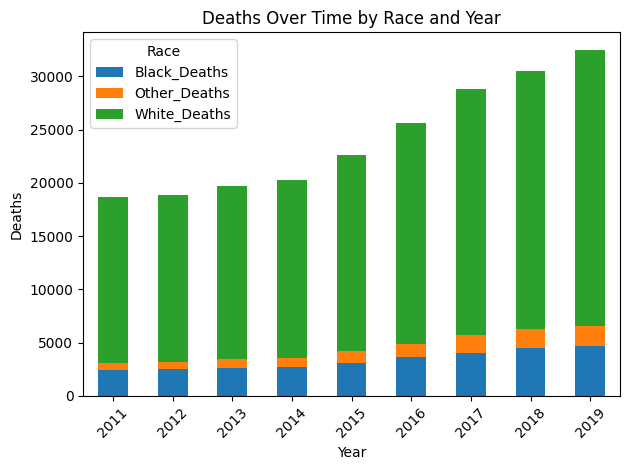

In [ ]:

yearwise_deaths_race = diabetesfinal2.groupby('Year')[['Black_Deaths', 'Other_Deaths', 'White_Deaths']].sum()


plt.figure(figsize=(10, 6))
yearwise_deaths_race.plot(kind='bar', stacked=True)
plt.title('Deaths Over Time by Race and Year')
plt.xlabel('Year')
plt.ylabel('Deaths')
plt.xticks(rotation=45)
plt.legend(title='Race', loc='upper left')
plt.tight_layout()
plt.show()


In [ ]:
diabetesfinal2.dtypes

,0
State,object
Year,object
Healthcare_Exp,int64
Black_Deaths,float64
Other_Deaths,float64
White_Deaths,float64
Black or African American Pop,float64
White Pop,float64
Other Population,float64
Poverty_Rate,float64


In [ ]:
diabetesfinal2 = diabetesfinal2.astype({
    'Year': 'int64',
    'GDP': 'float64',
    'Employment': 'float64'
})

In [ ]:
diabetesfinal2.dtypes

,0
State,object
Year,int64
Healthcare_Exp,int64
Black_Deaths,float64
Other_Deaths,float64
White_Deaths,float64
Black or African American Pop,float64
White Pop,float64
Other Population,float64
Poverty_Rate,float64


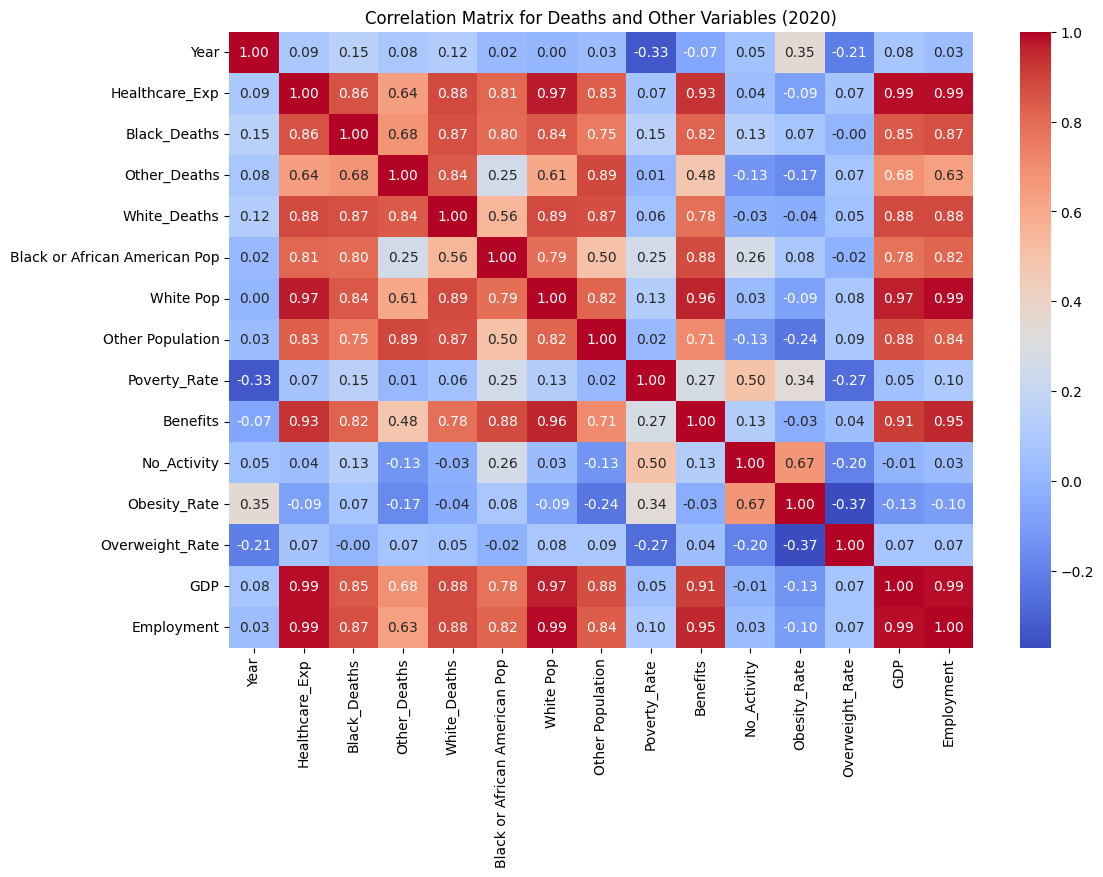

In [ ]:
numerical_data = diabetesfinal2.select_dtypes(include=['float64', 'int64'])
corr= numerical_data.corr()


plt.figure(figsize=(12, 8))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix for Deaths and Other Variables (2020)')
plt.show()

# DATA ANALYSIS

AGGREGATED DEATHS

In [ ]:

diabetesfinal2['Total_Deaths'] = diabetesfinal2['Black_Deaths'] + diabetesfinal2['White_Deaths'] + diabetesfinal2['Other_Deaths']

In [ ]:
diabetesfinal2.head()

,State,Year,Healthcare_Exp,Black_Deaths,Other_Deaths,White_Deaths,Black or African American Pop,White Pop,Other Population,Poverty_Rate,Benefits,No_Activity,Obesity_Rate,Overweight_Rate,GDP,Employment,Total_Deaths
12,Alabama,2011,51845,74.0,0.0,155.0,1288355.0,3407854.0,102860.0,19.1,10636438,32.6,32.0,34.7,182896.7,2497974.0,229.0
13,Alabama,2012,54519,97.0,0.0,168.0,1298130.0,3411015.0,106443.0,19.0,10939971,27.2,33.0,34.8,188280.7,2503656.0,265.0
14,Alabama,2013,56241,88.0,0.0,151.0,1307809.0,3413330.0,108942.0,18.9,10959284,31.5,32.4,35.7,193981.5,2523020.0,239.0
15,Alabama,2014,58651,111.0,0.0,136.0,1314912.0,3415586.0,111301.0,19.2,10797651,27.6,33.5,33.4,197064.4,2552256.0,247.0
16,Alabama,2015,61745,110.0,0.0,136.0,1322623.0,3415717.0,114007.0,18.5,10604330,31.9,35.6,33.0,203113.3,2587641.0,246.0


In [ ]:
diabetesfinal2.to_excel('diabetes_data2.xlsx', index=False)

In [ ]:

alpha_values = np.linspace(0.1, 2, 20)

results = []

for alpha in alpha_values:
    model = smf.glm("Total_Deaths ~ GDP + Poverty_Rate + Benefits + No_Activity + Obesity_Rate + Overweight_Rate + Healthcare_Exp + Employment",
                    data=diabetesfinal2, family=NegativeBinomial(alpha=alpha)).fit()
    results.append({
        'Alpha': alpha,
        'AIC': model.aic,
        'BIC': model.bic,
        'Log-Likelihood': model.llf
    })

results_df = pd.DataFrame(results)

best_alpha = results_df.loc[results_df['AIC'].idxmin()]
print("Best Alpha based on AIC:", best_alpha)



/usr/local/lib/python3.11/dist-packages/statsmodels/genmod/generalized_linear_model.py:1923: FutureWarning: The bic value is computed using the deviance formula. After 0.13 this will change to the log-likelihood based formula. This change has no impact on the relative rank of models compared using BIC. You can directly access the log-likelihood version using the `bic_llf` attribute. You can suppress this message by calling statsmodels.genmod.generalized_linear_model.SET_USE_BIC_LLF with True to get the LLF-based version now or False to retainthe deviance version.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/statsmodels/genmod/generalized_linear_model.py:1923: FutureWarning: The bic value is computed using the deviance formula. After 0.13 this will change to the log-likelihood based formula. This change has no impact on the relative rank of models compared using BIC. You can directly access the log-likelihood version using the `bic_llf` attribute. You can suppress this messa

Best Alpha based on AIC: Alpha                0.300000
AIC               5792.258375
BIC              -2280.980407
Log-Likelihood   -2887.129187
Name: 2, dtype: float64


/usr/local/lib/python3.11/dist-packages/statsmodels/genmod/generalized_linear_model.py:1923: FutureWarning: The bic value is computed using the deviance formula. After 0.13 this will change to the log-likelihood based formula. This change has no impact on the relative rank of models compared using BIC. You can directly access the log-likelihood version using the `bic_llf` attribute. You can suppress this message by calling statsmodels.genmod.generalized_linear_model.SET_USE_BIC_LLF with True to get the LLF-based version now or False to retainthe deviance version.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/statsmodels/genmod/generalized_linear_model.py:1923: FutureWarning: The bic value is computed using the deviance formula. After 0.13 this will change to the log-likelihood based formula. This change has no impact on the relative rank of models compared using BIC. You can directly access the log-likelihood version using the `bic_llf` attribute. You can suppress this messa

In [ ]:

scaler = StandardScaler()

predictors = ['GDP', 'Poverty_Rate', 'Benefits', 'No_Activity', 'Obesity_Rate', 'Overweight_Rate', 'Healthcare_Exp', 'Employment']

diabetesfinal2[predictors] = scaler.fit_transform(diabetesfinal2[predictors])

formula = "Total_Deaths ~ Q('GDP') + Q('Poverty_Rate') + Q('Benefits') + Q('No_Activity') + Q('Obesity_Rate') + Q('Overweight_Rate') + Q('Healthcare_Exp') + Employment"

model_aggregated_deaths = smf.glm(formula,
                                  data=diabetesfinal2,
                                  family=sm.families.NegativeBinomial(alpha=0.3)).fit()


print(model_aggregated_deaths.summary())



                 Generalized Linear Model Regression Results                  
Dep. Variable:           Total_Deaths   No. Observations:                  455
Model:                            GLM   Df Residuals:                      446
Model Family:        NegativeBinomial   Df Model:                            8
Link Function:                    Log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2887.1
Date:                Tue, 22 Apr 2025   Deviance:                       448.67
Time:                        01:13:07   Pearson chi2:                     432.
No. Iterations:                    15   Pseudo R-squ. (CS):             0.9678
Covariance Type:            nonrobust                                         
                           coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept                5.6511 

<ipython-input-46-f516805dec07>:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=coef_df.index, y='Coefficient', data=coef_df, palette='viridis')
<ipython-input-46-f516805dec07>:18: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  plt.plot([i, i], [coef_df['Lower CI'][i], coef_df['Upper CI'][i]], color='black', lw=2)


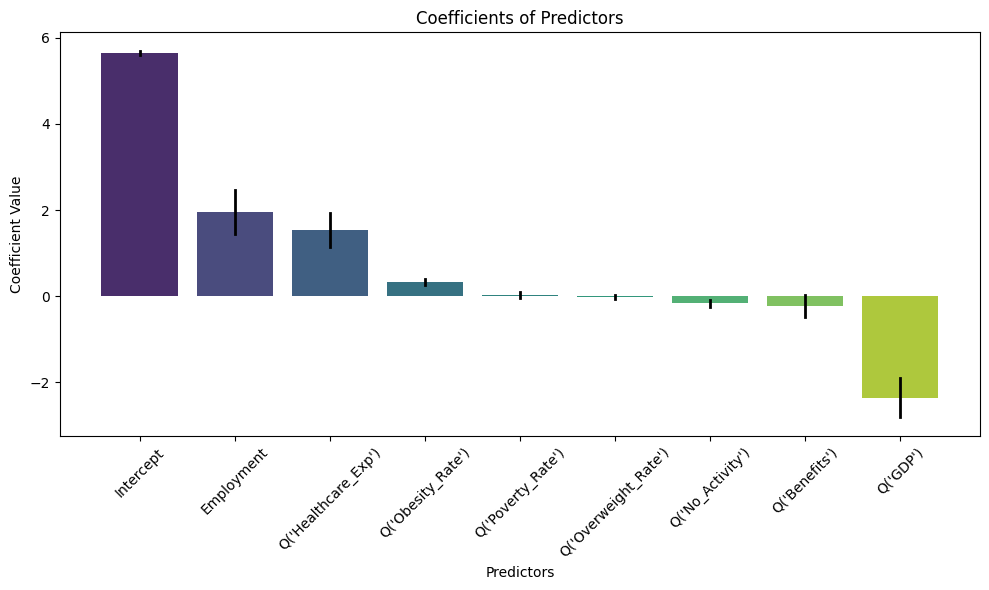

In [ ]:

coefficients = model_aggregated_deaths.params
conf_int = model_aggregated_deaths.conf_int()

coef_df = pd.DataFrame({
    'Coefficient': coefficients,
    'Lower CI': conf_int[0],
    'Upper CI': conf_int[1]
})


coef_df = coef_df.sort_values('Coefficient', ascending=False)


plt.figure(figsize=(10, 6))
sns.barplot(x=coef_df.index, y='Coefficient', data=coef_df, palette='viridis')

for i, coef in enumerate(coef_df['Coefficient']):
    plt.plot([i, i], [coef_df['Lower CI'][i], coef_df['Upper CI'][i]], color='black', lw=2)

plt.xticks(rotation=45)
plt.title('Coefficients of Predictors')
plt.xlabel('Predictors')
plt.ylabel('Coefficient Value')
plt.tight_layout()
plt.show()


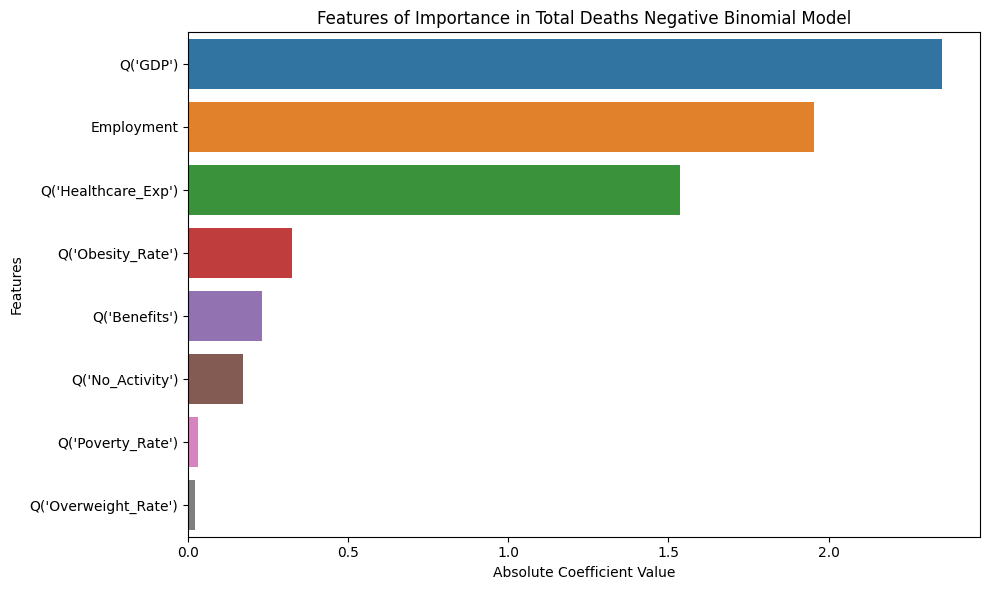

In [ ]:

coefficients = model_aggregated_deaths.params
p_values = model_aggregated_deaths.pvalues


importance_df = pd.DataFrame({
    'Feature': coefficients.index,
    'Coefficient': coefficients.values,
    'P-Value': p_values.values
})


importance_df = importance_df[importance_df['Feature'] != 'Intercept']


importance_df['Abs_Coefficient'] = importance_df['Coefficient'].abs()
importance_df = importance_df.sort_values('Abs_Coefficient', ascending=False)


plt.figure(figsize=(10, 6))
sns.barplot(x='Abs_Coefficient', y='Feature', data=importance_df, hue='Feature', dodge=False, legend=False)


plt.xlabel('Absolute Coefficient Value')
plt.ylabel('Features')
plt.title('Features of Importance in Total Deaths Negative Binomial Model')


plt.tight_layout()
plt.show()


RACIAL ANALYSIS

In [ ]:
import statsmodels.formula.api as smf
import statsmodels.api as sm
import pandas as pd

# Fit Negative Binomial models
black_deaths_model = smf.glm(
    formula="Black_Deaths ~ GDP + Poverty_Rate + Benefits + No_Activity + \
             Obesity_Rate + Overweight_Rate + Healthcare_Exp + Employment",
    data=diabetesfinal2,
    family=sm.families.NegativeBinomial()
).fit()

white_deaths_model = smf.glm(
    formula="White_Deaths ~ GDP + Poverty_Rate + Benefits + No_Activity + \
             Obesity_Rate + Overweight_Rate + Healthcare_Exp + Employment",
    data=diabetesfinal2,
    family=sm.families.NegativeBinomial()
).fit()

other_deaths_model = smf.glm(
    formula="Other_Deaths ~ GDP + Poverty_Rate + Benefits + No_Activity + \
             Obesity_Rate + Overweight_Rate + Healthcare_Exp + Employment",
    data=diabetesfinal2,
    family=sm.families.NegativeBinomial()
).fit()

# Function to extract coefficient and p-value
def extract_summary(model):
    summary_df = model.summary2().tables[1]
    return summary_df[['Coef.', 'P>|z|']].rename(columns={'Coef.': 'Coef', 'P>|z|': 'PValue'})

# Extract from all three models
black_summary = extract_summary(black_deaths_model).rename(columns={'Coef': 'Black_Coeff', 'PValue': 'Black_PValue'})
white_summary = extract_summary(white_deaths_model).rename(columns={'Coef': 'White_Coeff', 'PValue': 'White_PValue'})
other_summary = extract_summary(other_deaths_model).rename(columns={'Coef': 'Other_Coeff', 'PValue': 'Other_PValue'})

# Combine summaries into one DataFrame
combined = pd.concat([black_summary, white_summary, other_summary], axis=1)
combined.reset_index(inplace=True)
combined.rename(columns={'index': 'Variable'}, inplace=True)

# Display the combined summary
print(combined)


          Variable  Black_Coeff  Black_PValue  White_Coeff  White_PValue  \
0        Intercept     3.272629  0.000000e+00     5.477281  0.000000e+00   
1              GDP    -2.126970  7.759396e-07    -2.541075  2.270732e-09   
2     Poverty_Rate    -0.145641  4.315660e-02     0.030566  6.551854e-01   
3         Benefits     0.178429  4.521108e-01    -0.308434  1.863422e-01   
4      No_Activity     0.341251  4.125091e-06    -0.231999  1.093974e-03   
5     Obesity_Rate     0.380489  1.633050e-07     0.389726  1.821593e-08   
6  Overweight_Rate    -0.387571  7.287491e-12     0.058499  2.654252e-01   
7   Healthcare_Exp     0.238193  5.117701e-01     1.685145  2.884793e-06   
8       Employment     3.395214  2.484424e-12     2.041734  1.890446e-05   

   Other_Coeff  Other_PValue  
0     2.030741  0.000000e+00  
1     1.377854  1.894965e-03  
2     0.338479  3.440460e-06  
3    -0.436039  7.195602e-02  
4    -0.089188  2.423509e-01  
5    -0.429822  6.055804e-09  
6    -0.232176  3.3951

/usr/local/lib/python3.11/dist-packages/statsmodels/genmod/families/family.py:1367: ValueWarning: Negative binomial dispersion parameter alpha not set. Using default value alpha=1.0.
  warnings.warn("Negative binomial dispersion parameter alpha not "
/usr/local/lib/python3.11/dist-packages/statsmodels/genmod/families/family.py:1367: ValueWarning: Negative binomial dispersion parameter alpha not set. Using default value alpha=1.0.
  warnings.warn("Negative binomial dispersion parameter alpha not "
/usr/local/lib/python3.11/dist-packages/statsmodels/genmod/families/family.py:1367: ValueWarning: Negative binomial dispersion parameter alpha not set. Using default value alpha=1.0.
  warnings.warn("Negative binomial dispersion parameter alpha not "


In [ ]:
black_deaths_model = smf.glm(
    "Black_Deaths ~ Q('GDP') + Q('Poverty_Rate') + Q('Benefits') + Q('No_Activity') + \
     Q('Obesity_Rate') + Q('Overweight_Rate') + Q('Healthcare_Exp') + Employment",
    data=diabetesfinal2,
    family=sm.families.NegativeBinomial()
).fit()

white_deaths_model = smf.glm(
    "White_Deaths ~ Q('GDP') + Q('Poverty_Rate') + Q('Benefits') + Q('No_Activity') + \
     Q('Obesity_Rate') + Q('Overweight_Rate') + Q('Healthcare_Exp') + Employment",
    data=diabetesfinal2,
    family=sm.families.NegativeBinomial()
).fit()

other_deaths_model = smf.glm(
    "Other_Deaths ~ Q('GDP') + Q('Poverty_Rate') + Q('Benefits') + Q('No_Activity') + \
     Q('Obesity_Rate') + Q('Overweight_Rate') + Q('Healthcare_Exp') + Employment",
    data=diabetesfinal2,
    family=sm.families.NegativeBinomial()
).fit()

# Extract coefficients and p-values
def extract_summary(model):
    summary = model.summary2().tables[1]
    return summary[['Coef.', 'P>|z|']].rename(columns={'Coef.': 'Coef', 'P>|z|': 'PValue'})

black_summary = extract_summary(black_deaths_model)
white_summary = extract_summary(white_deaths_model)
other_summary = extract_summary(other_deaths_model)


combined = pd.concat([
    black_summary.rename(columns={'Coef': 'Black_Coeff', 'PValue': 'Black_PValue'}),
    white_summary.rename(columns={'Coef': 'White_Coeff', 'PValue': 'White_PValue'}),
    other_summary.rename(columns={'Coef': 'Other_Coeff', 'PValue': 'Other_PValue'})
], axis=1)


combined.reset_index(inplace=True)
combined.rename(columns={'index': 'Variable'}, inplace=True)


excel_path = 'negative_binomial_deaths_by_race.xlsx'
combined.to_excel(excel_path, index=False)

print(f"\nModel results saved to Excel: {excel_path}")




Model results saved to Excel: negative_binomial_deaths_by_race.xlsx


/usr/local/lib/python3.11/dist-packages/statsmodels/genmod/families/family.py:1367: ValueWarning: Negative binomial dispersion parameter alpha not set. Using default value alpha=1.0.
  warnings.warn("Negative binomial dispersion parameter alpha not "
/usr/local/lib/python3.11/dist-packages/statsmodels/genmod/families/family.py:1367: ValueWarning: Negative binomial dispersion parameter alpha not set. Using default value alpha=1.0.
  warnings.warn("Negative binomial dispersion parameter alpha not "
/usr/local/lib/python3.11/dist-packages/statsmodels/genmod/families/family.py:1367: ValueWarning: Negative binomial dispersion parameter alpha not set. Using default value alpha=1.0.
  warnings.warn("Negative binomial dispersion parameter alpha not "


In [ ]:
import pandas as pd
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant


predictors_black = ["GDP", "Poverty_Rate", "Benefits", "No_Activity", "Obesity_Rate",
                    "Overweight_Rate", "Healthcare_Exp","Employment"]


X_black = diabetesfinal2[predictors_black]


X_black = add_constant(X_black)


vif_data_black = pd.DataFrame()
vif_data_black["Variable"] = X_black.columns
vif_data_black["VIF"] = [variance_inflation_factor(X_black.values, i) for i in range(X_black.shape[1])]


print("VIF for Black Deaths model:")
print(vif_data_black)



VIF for Black Deaths model:
          Variable         VIF
0            const    1.000000
1              GDP   82.047131
2     Poverty_Rate    2.117393
3         Benefits   24.711443
4      No_Activity    2.283173
5     Obesity_Rate    2.164431
6  Overweight_Rate    1.242719
7   Healthcare_Exp   58.915008
8       Employment  103.383021


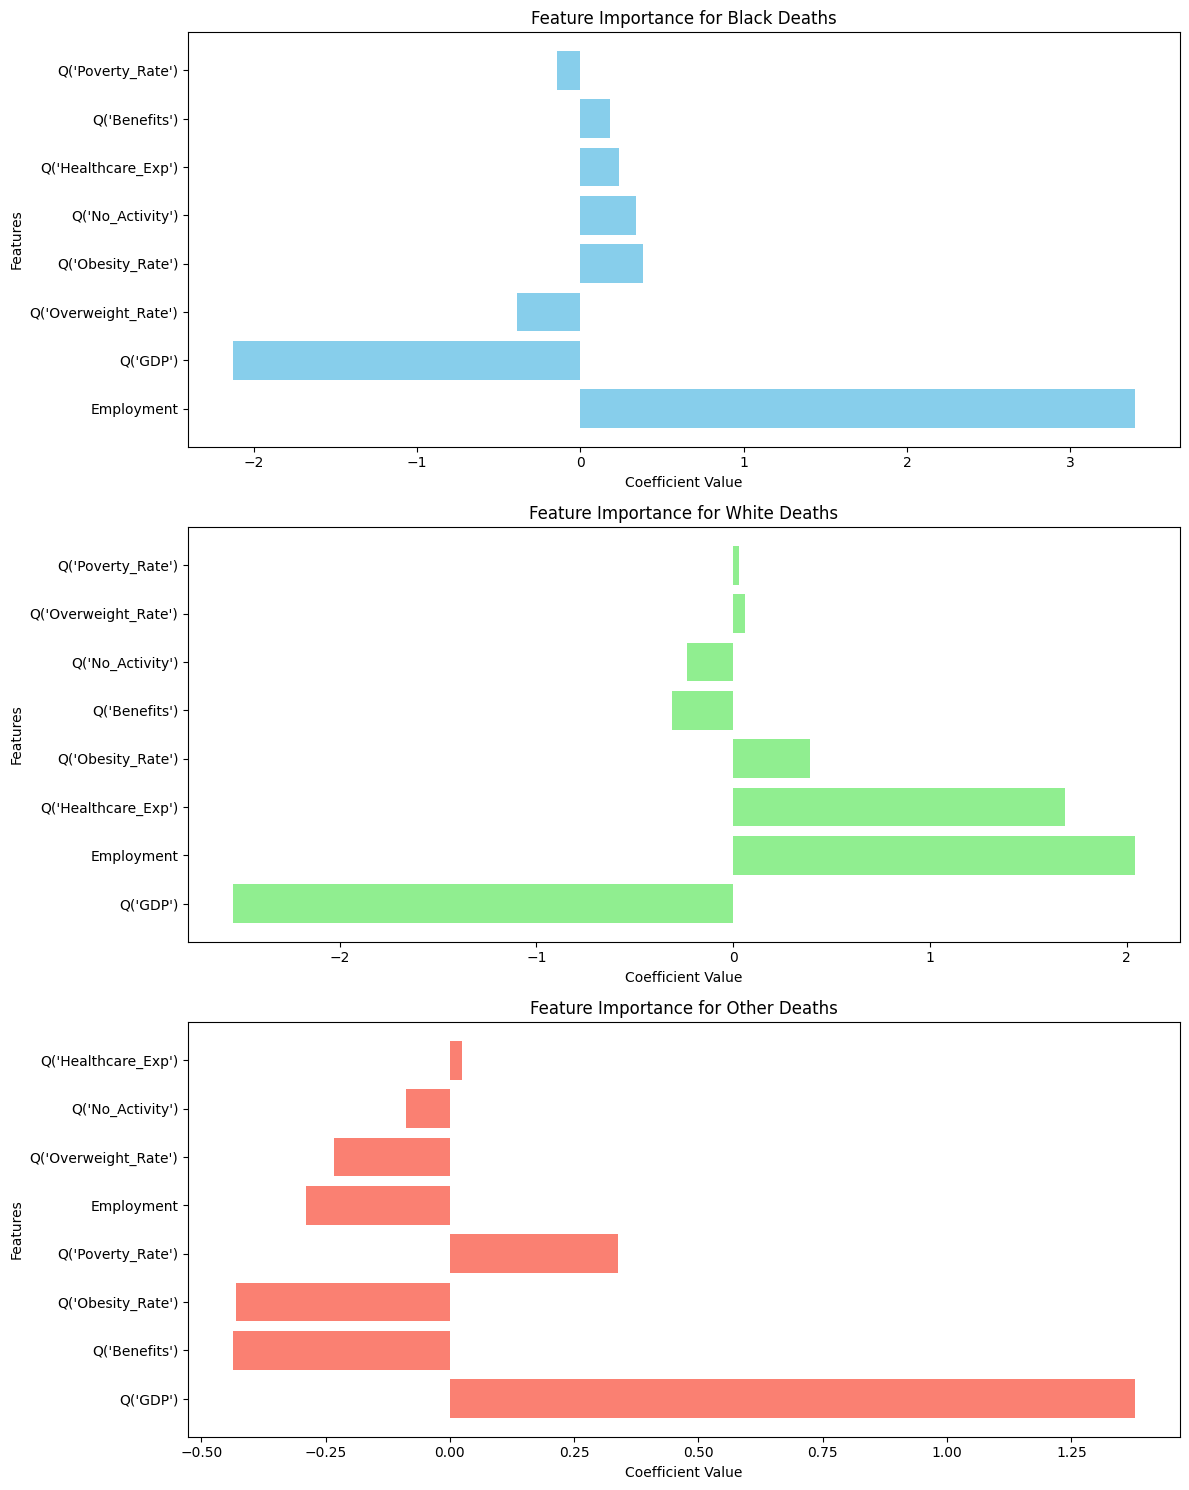

In [ ]:

black_deaths_features = black_deaths_model.params[1:]
white_deaths_features = white_deaths_model.params[1:]
other_deaths_features = other_deaths_model.params[1:]

black_deaths_df = pd.DataFrame({
    'Feature': black_deaths_features.index,
    'Coefficient': black_deaths_features.values
})

white_deaths_df = pd.DataFrame({
    'Feature': white_deaths_features.index,
    'Coefficient': white_deaths_features.values
})

other_deaths_df = pd.DataFrame({
    'Feature': other_deaths_features.index,
    'Coefficient': other_deaths_features.values
})


black_deaths_df = black_deaths_df.reindex(black_deaths_df['Coefficient'].abs().sort_values(ascending=False).index)
white_deaths_df = white_deaths_df.reindex(white_deaths_df['Coefficient'].abs().sort_values(ascending=False).index)
other_deaths_df = other_deaths_df.reindex(other_deaths_df['Coefficient'].abs().sort_values(ascending=False).index)


fig, axes = plt.subplots(3, 1, figsize=(12, 15))


axes[0].barh(black_deaths_df['Feature'], black_deaths_df['Coefficient'], color='skyblue')
axes[0].set_title('Feature Importance for Black Deaths')
axes[0].set_xlabel('Coefficient Value')
axes[0].set_ylabel('Features')

axes[1].barh(white_deaths_df['Feature'], white_deaths_df['Coefficient'], color='lightgreen')
axes[1].set_title('Feature Importance for White Deaths')
axes[1].set_xlabel('Coefficient Value')
axes[1].set_ylabel('Features')


axes[2].barh(other_deaths_df['Feature'], other_deaths_df['Coefficient'], color='salmon')
axes[2].set_title('Feature Importance for Other Deaths')
axes[2].set_xlabel('Coefficient Value')
axes[2].set_ylabel('Features')


plt.tight_layout()
plt.show()


Classification Model

High Risk States: ['California' 'Indiana' 'New Mexico' 'Ohio' 'Oregon' 'West Virginia']
Low Risk States: ['Alabama' 'Alaska' 'Arizona' 'Arkansas' 'Colorado' 'Connecticut'
 'Delaware' 'District of Columbia' 'Florida' 'Georgia' 'Hawaii' 'Idaho'
 'Illinois' 'Iowa' 'Kansas' 'Kentucky' 'Louisiana' 'Maine' 'Maryland'
 'Massachusetts' 'Michigan' 'Minnesota' 'Mississippi' 'Missouri' 'Montana'
 'Nebraska' 'Nevada' 'New Hampshire' 'New Jersey' 'New York'
 'North Carolina' 'North Dakota' 'Oklahoma' 'Pennsylvania' 'Rhode Island'
 'South Carolina' 'South Dakota' 'Tennessee' 'Texas' 'Utah' 'Vermont'
 'Virginia' 'Washington' 'Wisconsin' 'Wyoming']
Optimization terminated successfully.
         Current function value: 0.266684
         Iterations 8
                           Logit Regression Results                           
Dep. Variable:              High_Risk   No. Observations:                  318
Model:                          Logit   Df Residuals:                      310
Method:             

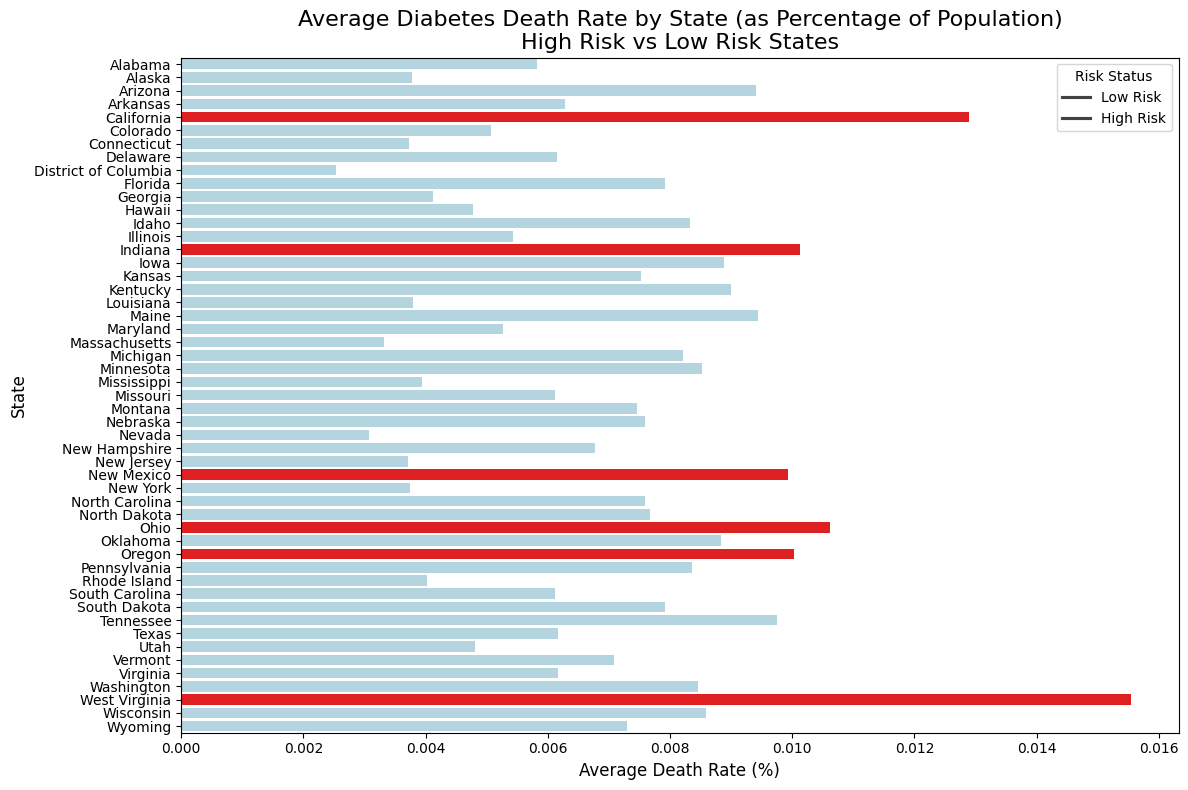

In [ ]:

diabetesfinal2['Total_Population'] = (diabetesfinal2['Black or African American Pop'] +
                                       diabetesfinal2['White Pop'] +
                                       diabetesfinal2['Other Population'])

diabetesfinal2['Diabetes_Death_Rate_Percentage'] = (diabetesfinal2['Total_Deaths'] / diabetesfinal2['Total_Population']) * 100


state_avg_death_rate = diabetesfinal2.groupby('State')['Diabetes_Death_Rate_Percentage'].mean()


percentile_90th = state_avg_death_rate.quantile(0.90)


diabetesfinal2['High_Risk'] = diabetesfinal2['State'].map(lambda x: int(state_avg_death_rate[x] >= percentile_90th))


high_risk_states = diabetesfinal2[diabetesfinal2['High_Risk'] == 1]['State'].unique()
low_risk_states = diabetesfinal2[diabetesfinal2['High_Risk'] == 0]['State'].unique()

print(f"High Risk States: {high_risk_states}")
print(f"Low Risk States: {low_risk_states}")


X = diabetesfinal2[['GDP', 'Poverty_Rate', 'Benefits', 'No_Activity', 'Obesity_Rate', 'Overweight_Rate', 'Healthcare_Exp']]
y = diabetesfinal2['High_Risk']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


X_train = sm.add_constant(X_train)
X_test = sm.add_constant(X_test)


logit_model = sm.Logit(y_train, X_train).fit()


print(logit_model.summary())


y_pred_prob = logit_model.predict(X_test)
y_pred_binary = (y_pred_prob >= 0.5).astype(int)


conf_matrix = confusion_matrix(y_test, y_pred_binary)
accuracy = accuracy_score(y_test, y_pred_binary)

print("\nConfusion Matrix:")
print(conf_matrix)
print(f"\nAccuracy of Logistic Regression Model: {accuracy:.2f}")

diabetesfinal2['High_Risk_Prob'] = logit_model.predict(sm.add_constant(X))


state_risk_df = pd.DataFrame({
    'State': state_avg_death_rate.index,
    'Avg_Death_Rate': state_avg_death_rate.values,
    'High_Risk': diabetesfinal2.groupby('State')['High_Risk'].first().values,
    'High_Risk_Prob': diabetesfinal2.groupby('State')['High_Risk_Prob'].mean().values
})

plt.figure(figsize=(12, 8))
sns.barplot(x='Avg_Death_Rate', y='State', data=state_risk_df, hue='High_Risk', dodge=False, palette={0: 'lightblue', 1: 'red'})

plt.title('Average Diabetes Death Rate by State (as Percentage of Population)\nHigh Risk vs Low Risk States', fontsize=16)
plt.xlabel('Average Death Rate (%)', fontsize=12)
plt.ylabel('State', fontsize=12)
plt.legend(title='Risk Status', labels=['Low Risk', 'High Risk'])

plt.tight_layout()
plt.show()



Overall Average Diabetes Death Rate: 0.07046795098792699
Overall Median Diabetes Death Rate: 0.06764380750099143
                   State  Avg_Diabetes_Death_Rate
0                Alabama                 0.058225
1                 Alaska                 0.037680
2                Arizona                 0.094053
3               Arkansas                 0.062782
4             California                 0.128981
5               Colorado                 0.050693
6            Connecticut                 0.037266
7               Delaware                 0.061525
8   District of Columbia                 0.025327
9                Florida                 0.079248
10               Georgia                 0.041240
11                Hawaii                 0.047738
12                 Idaho                 0.083251
13              Illinois                 0.054279
14               Indiana                 0.101325
15                  Iowa                 0.088788
16                Kansas             

<ipython-input-53-3646659047c8>:24: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=state_avg_death_rate, x='Avg_Diabetes_Death_Rate', y='State', palette='viridis', label='State Avg')


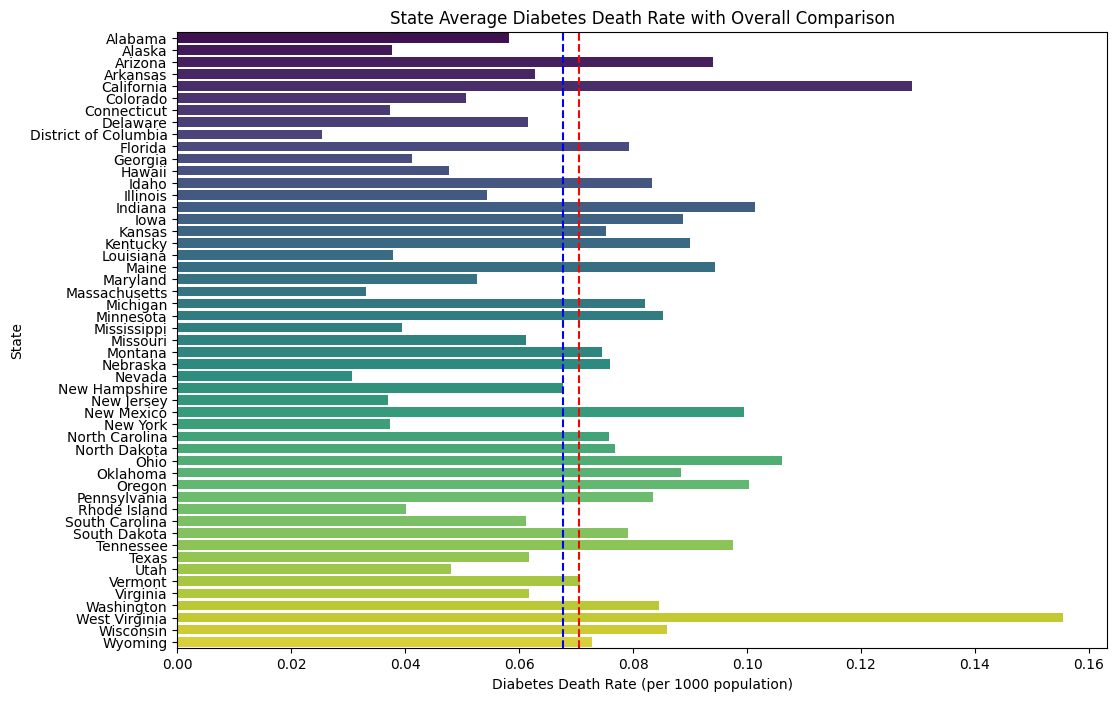

In [ ]:

diabetesfinal2['Diabetes_Death_Rate'] = (diabetesfinal2['Total_Deaths'] /
                                          (diabetesfinal2['Black or African American Pop'] +
                                           diabetesfinal2['White Pop'] +
                                           diabetesfinal2['Other Population'])) * 1000

state_avg_death_rate = diabetesfinal2.groupby('State')['Diabetes_Death_Rate'].mean().reset_index()
state_avg_death_rate.rename(columns={'Diabetes_Death_Rate': 'Avg_Diabetes_Death_Rate'}, inplace=True)


overall_avg_death_rate = diabetesfinal2['Diabetes_Death_Rate'].mean()


overall_median_death_rate = diabetesfinal2['Diabetes_Death_Rate'].median()

print(f'Overall Average Diabetes Death Rate: {overall_avg_death_rate}')
print(f'Overall Median Diabetes Death Rate: {overall_median_death_rate}')


print(state_avg_death_rate)


plt.figure(figsize=(12, 8))

sns.barplot(data=state_avg_death_rate, x='Avg_Diabetes_Death_Rate', y='State', palette='viridis', label='State Avg')

plt.axvline(overall_avg_death_rate, color='r', linestyle='--', label='Overall Average')
plt.axvline(overall_median_death_rate, color='b', linestyle='--', label='Overall Median')

plt.title('State Average Diabetes Death Rate with Overall Comparison')
plt.xlabel('Diabetes Death Rate (per 1000 population)')
plt.ylabel('State')


plt.show()


Standard Deviation

                     State  High_Risk
12                 Alabama          0
24                  Alaska          0
45                 Arizona          0
67                Arkansas          0
89              California          1
111               Colorado          0
133            Connecticut          0
155               Delaware          0
168   District of Columbia          0
188                Florida          0
210                Georgia          0
232                 Hawaii          0
254                  Idaho          0
276               Illinois          0
298                Indiana          1
320                   Iowa          0
342                 Kansas          0
364               Kentucky          0
386              Louisiana          0
408                  Maine          0
430               Maryland          0
452          Massachusetts          0
474               Michigan          0
496              Minnesota          0
518            Mississippi          0
540         

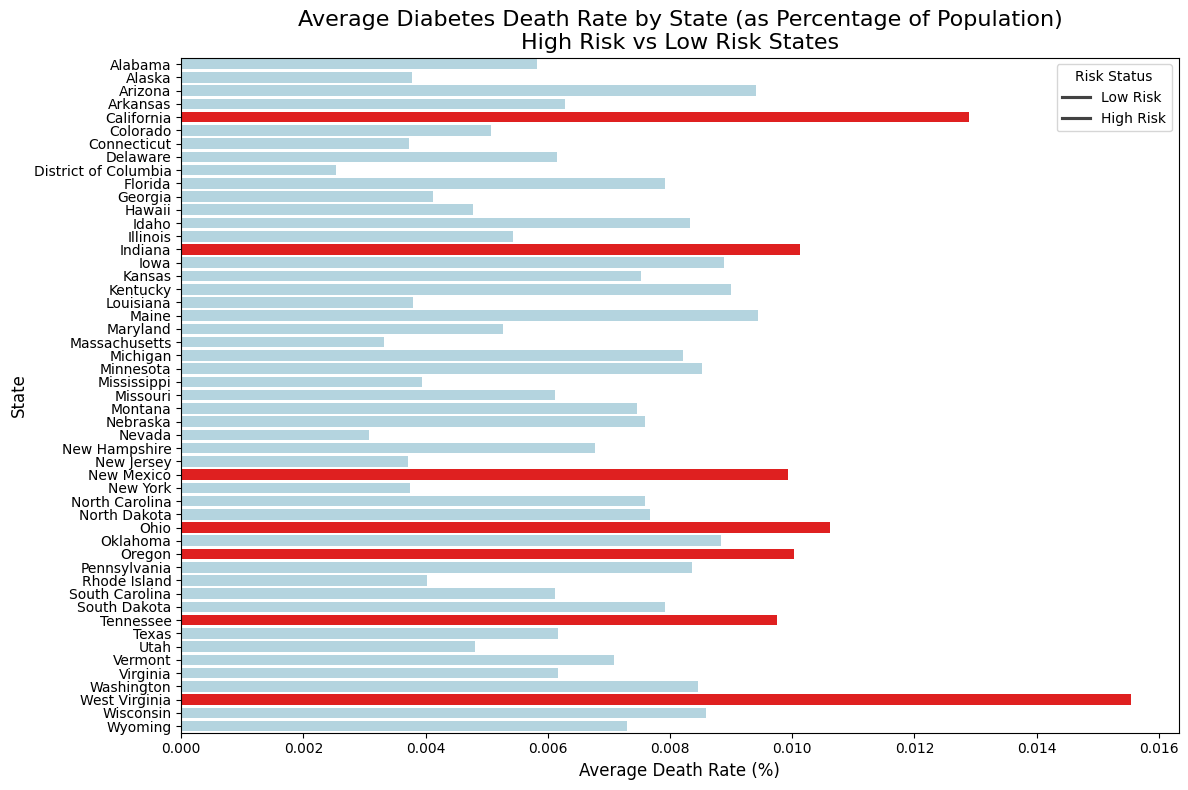

In [ ]:

diabetesfinal2['Total_Population'] = (diabetesfinal2['Black or African American Pop'] +
                                       diabetesfinal2['White Pop'] +
                                       diabetesfinal2['Other Population'])


diabetesfinal2['Diabetes_Death_Rate_Percentage'] = (diabetesfinal2['Total_Deaths'] / diabetesfinal2['Total_Population']) * 100


state_avg_death_rate = diabetesfinal2.groupby('State')['Diabetes_Death_Rate_Percentage'].mean()


mean_death_rate = state_avg_death_rate.mean()
std_death_rate = state_avg_death_rate.std()


high_risk_threshold = mean_death_rate + std_death_rate


diabetesfinal2['High_Risk'] = diabetesfinal2['State'].map(state_avg_death_rate >= high_risk_threshold).astype(int)


print(diabetesfinal2[['State', 'High_Risk']].drop_duplicates())


high_risk_states = diabetesfinal2[diabetesfinal2['High_Risk'] == 1]['State'].unique()
low_risk_states = diabetesfinal2[diabetesfinal2['High_Risk'] == 0]['State'].unique()

print(f"High Risk States: {high_risk_states}")
print(f"Low Risk States: {low_risk_states}")


state_avg_death_rate = diabetesfinal2.groupby('State')['Diabetes_Death_Rate_Percentage'].mean()

state_risk_df = pd.DataFrame({
    'State': state_avg_death_rate.index,
    'Avg_Death_Rate': state_avg_death_rate.values,
    'High_Risk': (state_avg_death_rate >= high_risk_threshold).astype(int)
})


plt.figure(figsize=(12, 8))
sns.barplot(x='Avg_Death_Rate', y='State', data=state_risk_df, hue='High_Risk', dodge=False, palette={0: 'lightblue', 1: 'red'})


plt.title('Average Diabetes Death Rate by State (as Percentage of Population)\nHigh Risk vs Low Risk States', fontsize=16)
plt.xlabel('Average Death Rate (%)', fontsize=12)
plt.ylabel('State', fontsize=12)
plt.legend(title='Risk Status', labels=['Low Risk', 'High Risk'])


plt.tight_layout()
plt.show()


Logistic Regression Coefficients:
const             -2.740990
GDP               -1.973531
Poverty_Rate       1.773996
Benefits          -2.502300
No_Activity       -1.220565
Obesity_Rate       0.645371
Overweight_Rate   -0.057380
Healthcare_Exp     4.909429
dtype: float64

Odds Ratios:
                 Coefficient  Odds_Ratio
const              -2.740990    0.064506
GDP                -1.973531    0.138965
Poverty_Rate        1.773996    5.894361
Benefits           -2.502300    0.081896
No_Activity        -1.220565    0.295063
Obesity_Rate        0.645371    1.906695
Overweight_Rate    -0.057380    0.944235
Healthcare_Exp      4.909429  135.561925

Predictor Variables for High-Risk States:
              State       GDP  Poverty_Rate  Benefits  No_Activity  \
89       California  3.669367      0.801227  3.099399    -1.352777   
90       California  3.879585      0.926721  3.378963    -1.329343   
91       California  4.133266      0.863974  3.566420    -0.813778   
92       California  

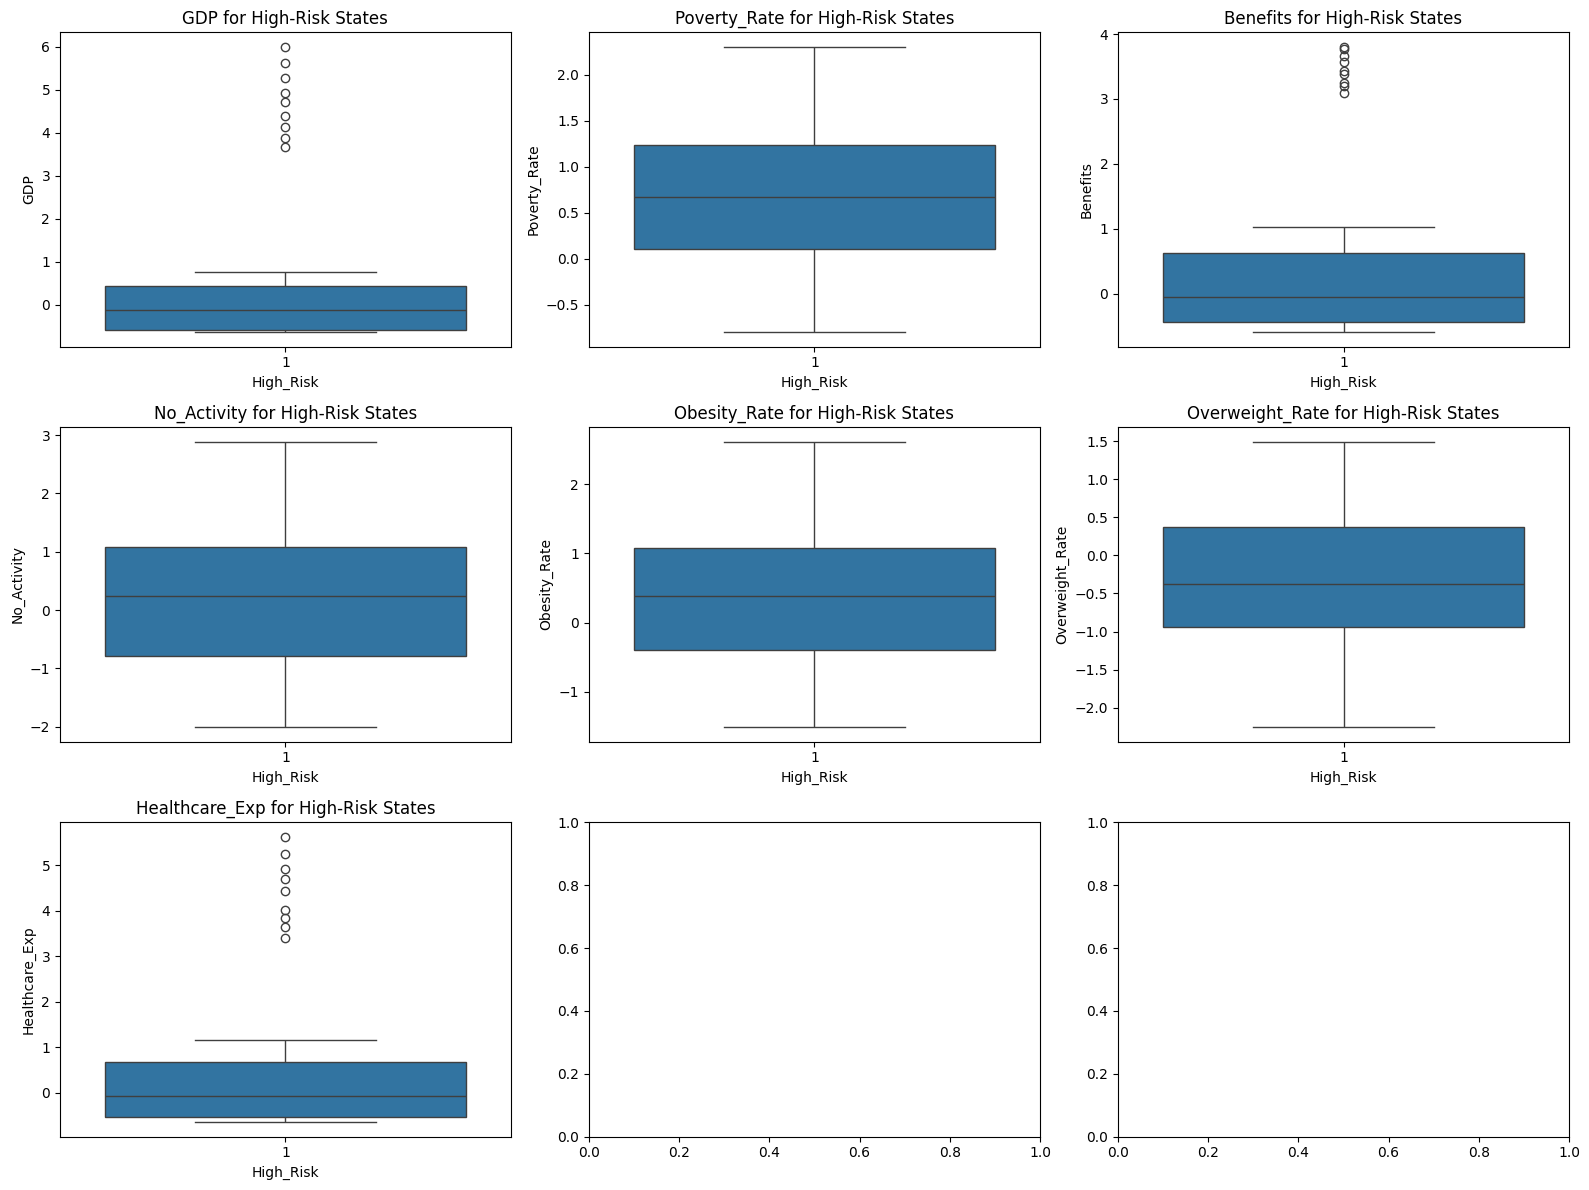

In [ ]:

coefficients = logit_model.params
print("Logistic Regression Coefficients:")
print(coefficients)

odds_ratios = pd.DataFrame({
    'Coefficient': coefficients,
    'Odds_Ratio': np.exp(coefficients)
})

print("\nOdds Ratios:")
print(odds_ratios)


high_risk_states_df = diabetesfinal2[diabetesfinal2['High_Risk'] == 1]


high_risk_state_factors = high_risk_states_df[['State', 'GDP', 'Poverty_Rate', 'Benefits', 'No_Activity', 'Obesity_Rate', 'Overweight_Rate', 'Healthcare_Exp']]
print("\nPredictor Variables for High-Risk States:")
print(high_risk_state_factors)


import seaborn as sns
import matplotlib.pyplot as plt


fig, axes = plt.subplots(3, 3, figsize=(16, 12))
fig.tight_layout(pad=5.0)


variables = ['GDP', 'Poverty_Rate', 'Benefits', 'No_Activity', 'Obesity_Rate', 'Overweight_Rate', 'Healthcare_Exp']

axes = axes.flatten()


for i, var in enumerate(variables):
    sns.boxplot(x='High_Risk', y=var, data=high_risk_states_df, ax=axes[i])
    axes[i].set_title(f'{var} for High-Risk States')

plt.tight_layout()
plt.show()


<ipython-input-56-978dff935ddc>:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=state_avg.index, y=state_avg[var], palette='viridis')


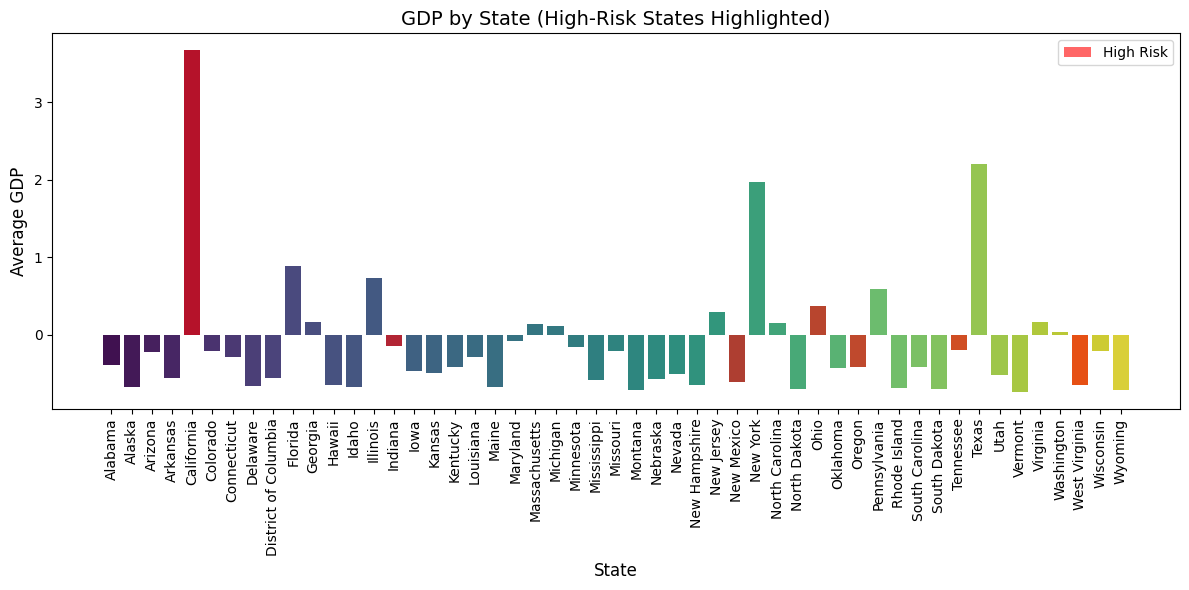

<ipython-input-56-978dff935ddc>:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=state_avg.index, y=state_avg[var], palette='viridis')


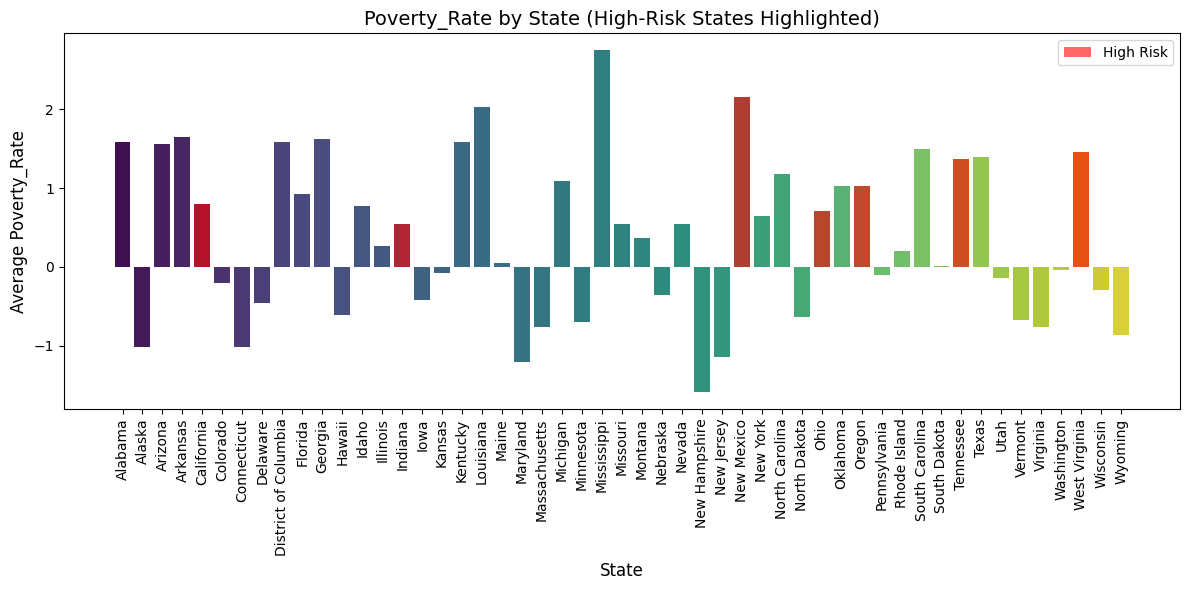

<ipython-input-56-978dff935ddc>:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=state_avg.index, y=state_avg[var], palette='viridis')


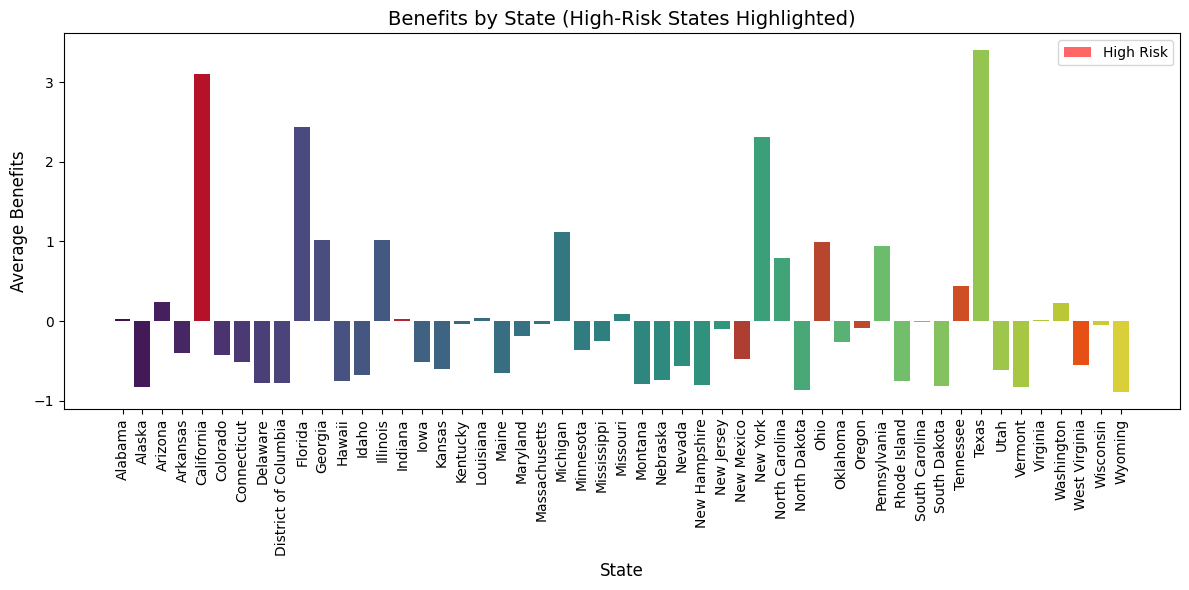

<ipython-input-56-978dff935ddc>:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=state_avg.index, y=state_avg[var], palette='viridis')


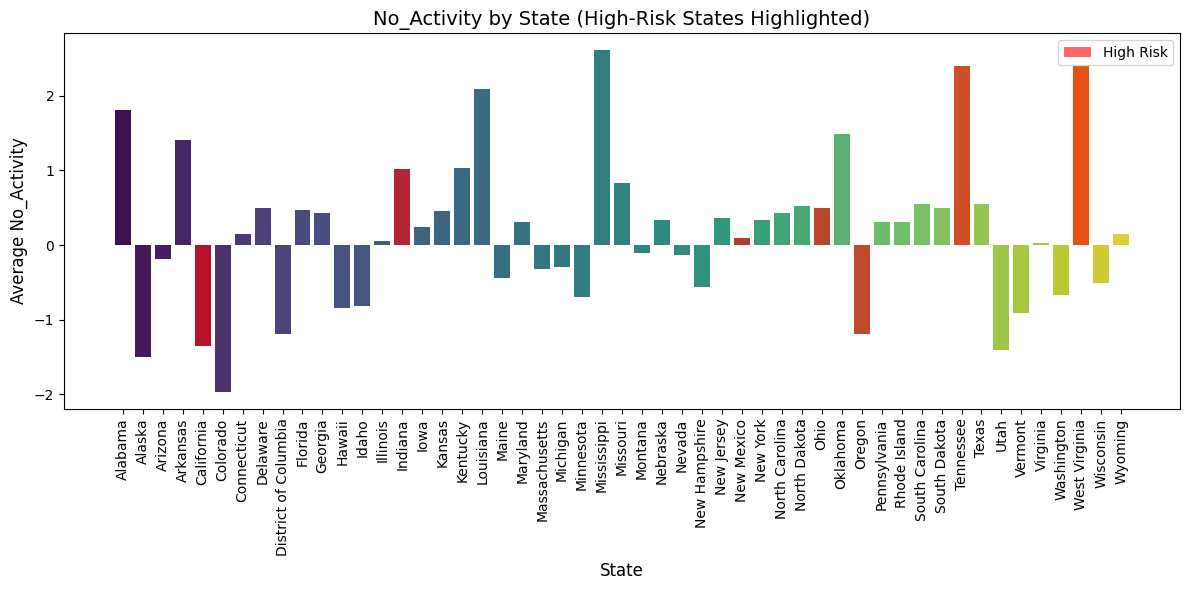

<ipython-input-56-978dff935ddc>:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=state_avg.index, y=state_avg[var], palette='viridis')


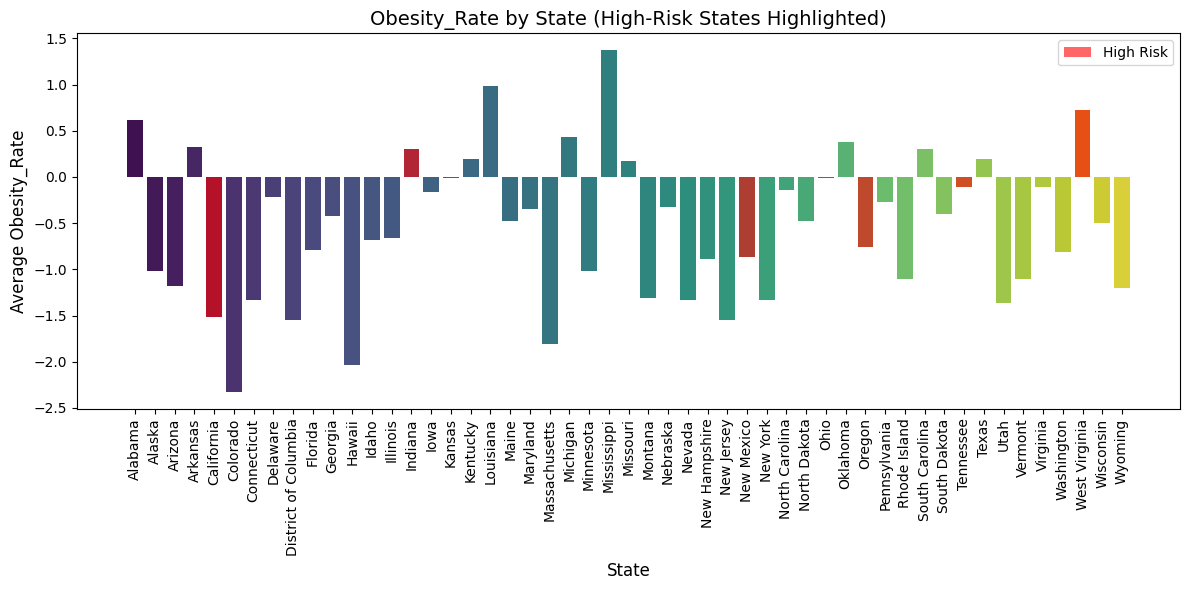

<ipython-input-56-978dff935ddc>:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=state_avg.index, y=state_avg[var], palette='viridis')


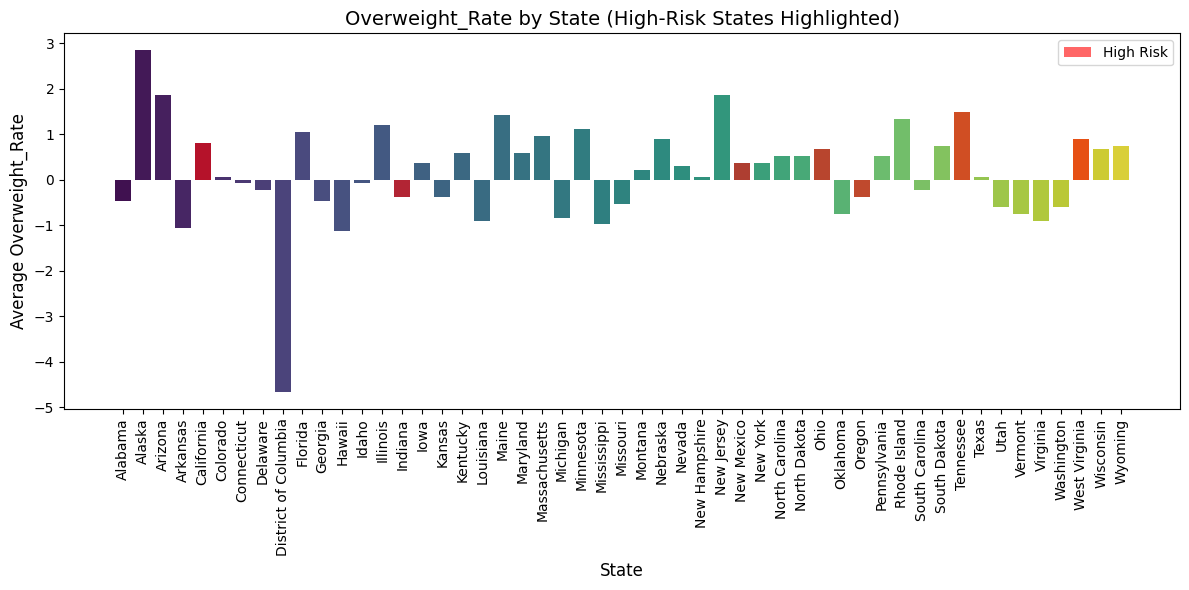

<ipython-input-56-978dff935ddc>:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=state_avg.index, y=state_avg[var], palette='viridis')


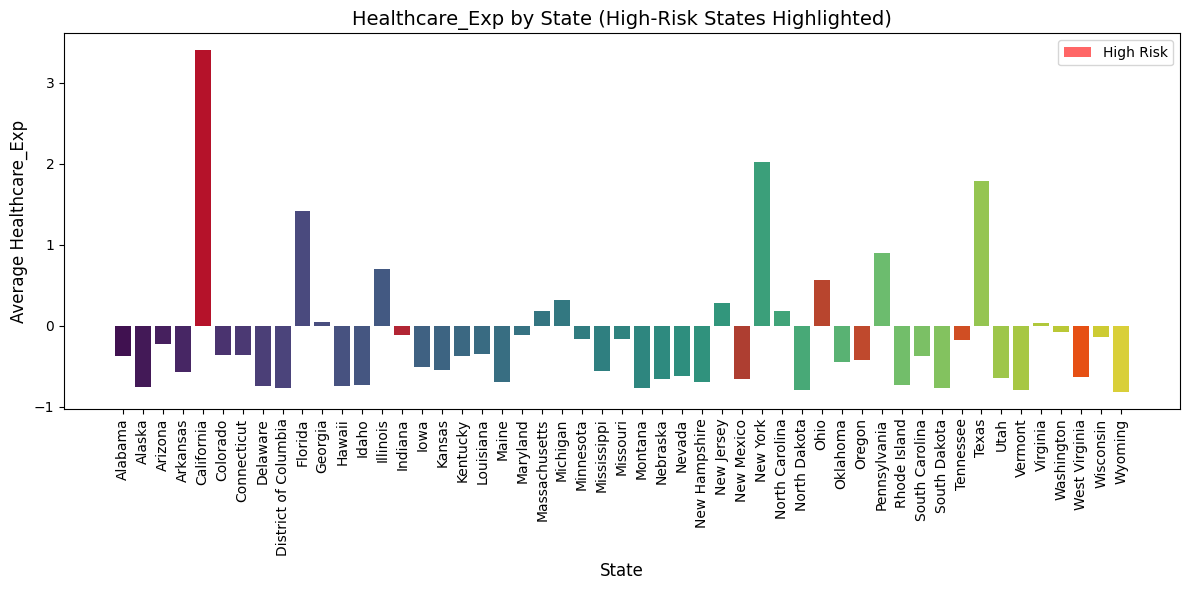

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

diabetesfinal2_unique = diabetesfinal2.drop_duplicates(subset=['State'])

variables = ['GDP', 'Poverty_Rate', 'Benefits', 'No_Activity', 'Obesity_Rate', 'Overweight_Rate', 'Healthcare_Exp']

state_avg = diabetesfinal2_unique.groupby('State')[variables].mean()


high_risk_states = diabetesfinal2_unique[diabetesfinal2_unique['High_Risk'] == 1]['State'].unique()

for var in variables:
    plt.figure(figsize=(12, 6))
    sns.barplot(x=state_avg.index, y=state_avg[var], palette='viridis')
    high_risk_avg = state_avg.loc[high_risk_states, var]
    plt.bar(high_risk_avg.index, high_risk_avg, color='red', label='High Risk', alpha=0.6)

    plt.title(f'{var} by State (High-Risk States Highlighted)', fontsize=14)
    plt.xlabel('State', fontsize=12)
    plt.ylabel(f'Average {var}', fontsize=12)
    plt.xticks(rotation=90)
    plt.legend()


    plt.tight_layout()
    plt.show()


In [ ]:
import pandas as pd

# Drop duplicates to get unique states
diabetesfinal2_unique = diabetesfinal2.drop_duplicates(subset=['State'])

# List of variables to analyze
variables = ['GDP', 'Poverty_Rate', 'Benefits', 'No_Activity', 'Obesity_Rate', 'Overweight_Rate', 'Healthcare_Exp']

# Group by State and calculate the average for each variable
state_avg = diabetesfinal2_unique.groupby('State')[variables].mean()

# Get high-risk states
high_risk_states = diabetesfinal2_unique[diabetesfinal2_unique['High_Risk'] == 1]['State'].unique()

# Create an empty list to store results
high_risk_table = []

# Loop over each variable and prepare the data
for var in variables:
    # Get the average for high-risk states for the current variable
    high_risk_avg = state_avg.loc[high_risk_states, var]

    # Create a temporary dictionary with State, average for the variable, and if the state is high-risk
    temp_dict = state_avg[[var]].reset_index().rename(columns={var: f'Average_{var}'})
    temp_dict['High_Risk'] = temp_dict['State'].apply(lambda x: 'Yes' if x in high_risk_states else 'No')

    # Append this to the results list
    high_risk_table.append(temp_dict)

# Combine all the data into one DataFrame
final_table = pd.concat(high_risk_table, axis=1)

# Drop duplicate columns for 'State' and reset index
final_table = final_table.loc[:, ~final_table.columns.duplicated()]
final_table = final_table.set_index('State')

# Print the final table
print(final_table)


                      Average_GDP High_Risk  Average_Poverty_Rate  \
State                                                               
Alabama                 -0.390212        No              1.585562   
Alaska                  -0.666391        No             -1.018428   
Arizona                 -0.215528        No              1.554188   
Arkansas                -0.561359        No              1.648308   
California               3.669367       Yes              0.801227   
Colorado                -0.205723        No             -0.202720   
Connecticut             -0.279006        No             -1.018428   
Delaware                -0.659610        No             -0.453707   
District of Columbia    -0.551923        No              1.585562   
Florida                  0.891510        No              0.926721   
Georgia                  0.164559        No              1.616935   
Hawaii                  -0.643157        No             -0.610574   
Idaho                   -0.668392 